<div style="text-align:center"> <h1><font color='SlateBlue'>CHENNAI HOUSE SALES PRICE PREDICTION</font><h2></div>

# Problem statement:
                 Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money.  Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?
                  
### Explanation of column values:  
**1.SALE_COND** <br>
* ***Family***: Sales happens within your family members. 
* ***Partial***: Selling only part of the builing.
* ***AdjLand***: Selling the adjacent building. 
* ***Normal Sale***: Just a normal sale.
* ***AbNormal***: If above conditons not suited

**2.PARK_FACIL** <br>
* ***Yes***: If parking facility available.
* ***No***: If parking facility not available.

**3.BUILDTYPE** <br>
* ***House***: If the builing is house.
* ***Commercial***:If the building is for commercial purpose.
* ***Others***:If anything not comes under above two.

**4.UTILITY_AVAIL** <br>
* ***AllPub***: If all facilities available
* ***ELO***: If ELO facility available
* ***NoSewr***: If there is no sewage system.

**5.STREET** <br>
* ***Paved***: If it has a proper road.
* ***Gravel***: If it has a gravel road.
* ***No Access***: If it has no access to the road.

**6.MZZONE** <br>
* ***A***: Agricultural Land
* ***RH***: Residential High
* ***RM***: Residential Medium
* ***RL***: Residential Low
* ***I***: Industial Land
* ***C***: Commercial Land

<div style="text-align:left"> <h1><font color='red'>Start of codes:</font><h2></div>

In [159]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [160]:
#loading the csv file in pandas datadrame.
df=pd.read_csv('train-chennai-sale.csv')
pd.set_option('display.max_columns',None)
df

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0            1.0       3     AbNormal        Yes  15-05-1967  Commercial   
1            1.0       5     AbNormal         No  22-12-1995  Commercial   
2            1.0       3     AbNormal        Yes  09-02-1992  Commercial   
3            2.0       5       Family         No  18-03-1988      Others   
4            1.0       3     AbNormal        Yes  13-10-1979      Others   
...          ...     ...          ...        ...         ...         ...   
7104         1.0       2      AdjLand         No  15-01-1962      Others   
7105         2.0       5       Family        Yes  11-04-1995      Others   
7106         1.0       4  Normal Sale         No  01-09-1978       House   
7107         1.0       2      Partial        Yes  11-08-1977  Commercial   
7108         2.0       5      Partial        Yes  24-07-1961      Others   

     UTILITY_AVAIL     STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  \
0           AllPub      Paved      A       4.0          3.9         4.9   
1           AllPub     Gravel     RH       4.9          4.2         2.5   
2              ELO     Gravel     RL       4.1          3.8         2.2   
3          NoSewr       Paved      I       4.7          3.9         3.6   
4           AllPub     Gravel      C       3.0          2.5         4.1   
...            ...        ...    ...       ...          ...         ...   
7104           ELO  No Access     RM       3.0          2.2         2.4   
7105        NoSeWa  No Access     RH       3.6          4.5         3.3   
7106        NoSeWa     Gravel      I       4.3          4.2         2.9   
7107           ELO      Paved     RL       4.6          3.8         4.1   
7108           ELO      Paved      I       3.1          3.5         4.3   

      QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0          4.330   380000  144400      7600000  
1          3.765   760122  304049     21717770  
2          3.090   421094   92114     13159200  
3          4.010   356321   77042      9630290  
4          3.290   237000   74063      7406250  
...          ...      ...     ...          ...  
7104       2.520   208767  107060      5353000  
7105       3.920   346191  205551     10818480  
7106       3.840   317354  167028      8351410  
7107       4.160   425350  119098      8507000  
7108       3.640   349177   79812      9976480  

[7109 rows x 22 columns]

In [161]:
df.shape

(7109, 22)

## Data cleaning:
* Check for duplicates
* change into correct datatypes
* Imputation of missing values
* Correction of spelling mistakes

In [162]:
#dropping the duplicates
df=df.drop_duplicates()

In [163]:
#checking for null values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [164]:
#Verifying the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [165]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

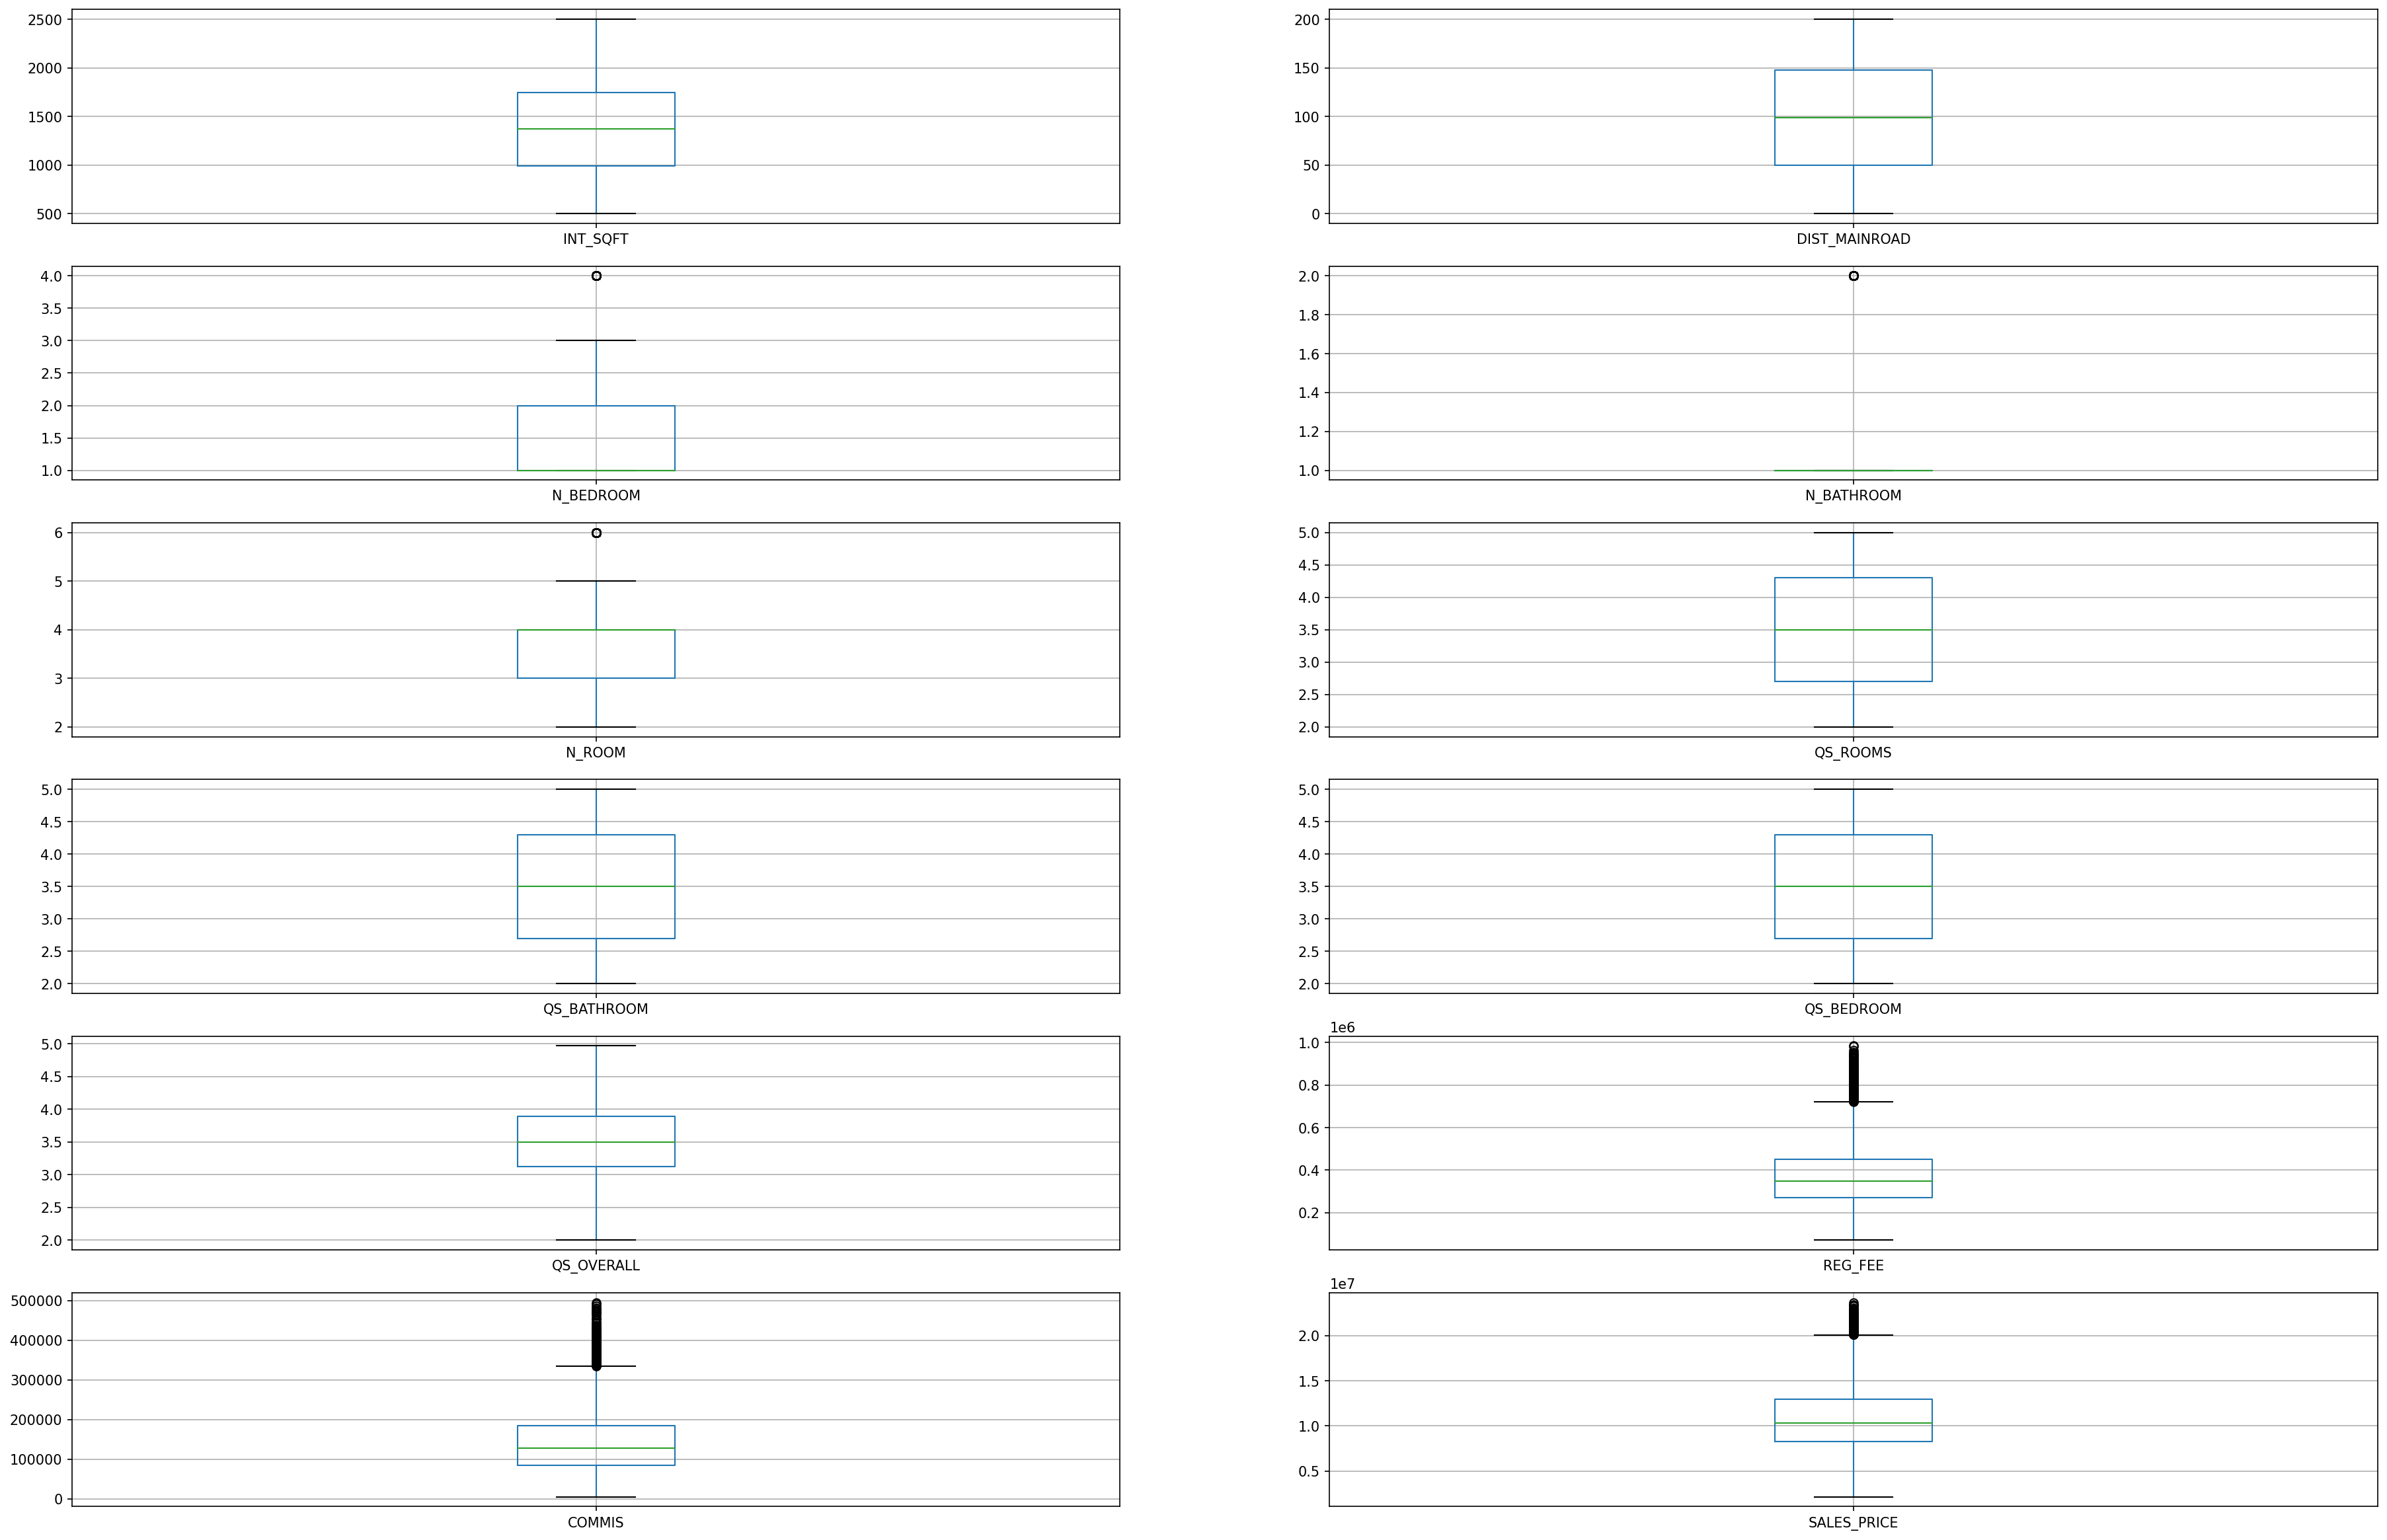

In [166]:
plt.figure(figsize=(30, 20), dpi=150)

plt.subplot(6,2,1)
df.boxplot(column = 'INT_SQFT')

plt.subplot(6,2,2)
df.boxplot(column = 'DIST_MAINROAD')

plt.subplot(6,2,3)
df.boxplot(column = 'N_BEDROOM')

plt.subplot(6,2,4)
df.boxplot(column = 'N_BATHROOM')

plt.subplot(6,2,5)
df.boxplot(column = 'N_ROOM')

plt.subplot(6,2,6)
df.boxplot(column = 'QS_ROOMS')

plt.subplot(6,2,7)
df.boxplot(column = 'QS_BATHROOM')

plt.subplot(6,2,8)
df.boxplot(column = 'QS_BEDROOM')

plt.subplot(6,2,9)
df.boxplot(column = 'QS_OVERALL')

plt.subplot(6,2,10)
df.boxplot(column = 'REG_FEE')

plt.subplot(6,2,11)
df.boxplot(column = 'COMMIS')

plt.subplot(6,2,12)
df.boxplot(column = 'SALES_PRICE')

plt.show()

In [167]:
for col in df.columns:
    print(col,'Unique count is :',len(df[col].unique()))
    print()

PRT_ID Unique count is : 7109

AREA Unique count is : 17

INT_SQFT Unique count is : 1699

DATE_SALE Unique count is : 2798

DIST_MAINROAD Unique count is : 201

N_BEDROOM Unique count is : 5

N_BATHROOM Unique count is : 3

N_ROOM Unique count is : 5

SALE_COND Unique count is : 9

PARK_FACIL Unique count is : 3

DATE_BUILD Unique count is : 5808

BUILDTYPE Unique count is : 5

UTILITY_AVAIL Unique count is : 5

STREET Unique count is : 5

MZZONE Unique count is : 6

QS_ROOMS Unique count is : 31

QS_BATHROOM Unique count is : 31

QS_BEDROOM Unique count is : 31

QS_OVERALL Unique count is : 480

REG_FEE Unique count is : 7038

COMMIS Unique count is : 7011

SALES_PRICE Unique count is : 7057



In [168]:
#Checking the unique values for categorical feautures
for val in df.columns:
    if df[val].dtype=='object':
        print(val,'unique values are',df[val].unique())
        print()

PRT_ID unique values are ['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA unique values are ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE unique values are ['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND unique values are ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL unique values are ['Yes' 'No' 'Noo']

DATE_BUILD unique values are ['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE unique values are ['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL unique values are ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET unique values are ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE unique values are ['A' 'RH' 'RL' 'I' 'C' 'RM']



## General observation from the dataframe:<br>
* There is no duplicates in the dataset.
* 53 null values identified.
* Datatype of **DATE_SALE, DATE_BUILD, N_BEDROOM and N_BATHROOM** are wrong.
* Spelling mistakes in numerous categorical column values.
* Age of building can be calculated with **DATE_SALE and DATE_BUILD**.
* We have four feautures of masked values.

In [169]:
#Filling the null values.
#N_BEDROOM has 1 null value we can use mode for this as its a discrete numerical variable.
#N_BATHROOM have 5 null values we can use mode for this as its a discrete numerical variable.
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0], inplace=True)
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)


#For QS_OVERALL , the values can be filled by the mean of QS_ROOMS, QS_BATHROOM and QS_BEDROOM
df['QS_OVERALL'].fillna(((df['QS_ROOMS']+df['QS_BATHROOM']+df['QS_BEDROOM'])/3),inplace=True)

In [170]:
#Correcting the datatypes of the feautures.
df['DATE_SALE']= pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']= pd.to_datetime(df['DATE_BUILD'])
df=df.astype({"N_BEDROOM":'int',"N_BATHROOM":'int'})

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int32         
 6   N_BATHROOM     7109 non-null   int32         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [172]:
#Feauture engineering
#Calculating the age of the building
df['BUILD_AGE'] = pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

In [173]:
for col in df.columns:
    print(col,'Unique count is :',len(df[col].unique()))
    print()

PRT_ID Unique count is : 7109

AREA Unique count is : 17

INT_SQFT Unique count is : 1699

DATE_SALE Unique count is : 2798

DIST_MAINROAD Unique count is : 201

N_BEDROOM Unique count is : 4

N_BATHROOM Unique count is : 2

N_ROOM Unique count is : 5

SALE_COND Unique count is : 9

PARK_FACIL Unique count is : 3

DATE_BUILD Unique count is : 5808

BUILDTYPE Unique count is : 5

UTILITY_AVAIL Unique count is : 5

STREET Unique count is : 5

MZZONE Unique count is : 6

QS_ROOMS Unique count is : 31

QS_BATHROOM Unique count is : 31

QS_BEDROOM Unique count is : 31

QS_OVERALL Unique count is : 509

REG_FEE Unique count is : 7038

COMMIS Unique count is : 7011

SALES_PRICE Unique count is : 7057

BUILD_AGE Unique count is : 53



In [174]:
for val in df.columns:
    if df[val].dtype=='object':
        print(val,'unique values are',df[val].unique())
        print()

PRT_ID unique values are ['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA unique values are ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

SALE_COND unique values are ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL unique values are ['Yes' 'No' 'Noo']

BUILDTYPE unique values are ['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL unique values are ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET unique values are ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE unique values are ['A' 'RH' 'RL' 'I' 'C' 'RM']



### Dropping of feautures:
* **PRT_ID** has only unique values so we can drop it.
* **REG_FEE** and **COMMIS** values, we won't be knowing this before hand when we buy a house,so we can drop it.
* After calculating the age of the building we can drop the **DATE_SALE** and **DATE_BUILD**.

In [175]:
#dropping the unnecessary feautures.
del df['PRT_ID']
del df['REG_FEE']
del df['COMMIS']
del df['DATE_BUILD']
del df['DATE_SALE']

In [176]:
#Correcting the spelling mistakes in the column values.
df['AREA']= df['AREA'].replace(['Karapakam'],'Karapakkam')
df['AREA']= df['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar')
df['AREA']= df['AREA'].replace(['Adyr'],'Adyar')
df['AREA']= df['AREA'].replace(['Velchery'],'Velachery')
df['AREA']= df['AREA'].replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet')
df['AREA']= df['AREA'].replace(['KKNagar'],'KK Nagar')
df['AREA']= df['AREA'].replace(['T Nagar'],'TNagar')

In [177]:
df['SALE_COND']= df['SALE_COND'].replace(['Ab Normal'],'AbNormal')
df['SALE_COND']= df['SALE_COND'].replace(['Partiall','PartiaLl'],'Partial')
df['SALE_COND']= df['SALE_COND'].replace(['Adj Land'],'AdjLand')

In [178]:
df['PARK_FACIL']= df['PARK_FACIL'].replace(['Noo'],'No')

In [179]:
df['BUILDTYPE']= df['BUILDTYPE'].replace(['Comercial'],'Commercial')
df['BUILDTYPE']= df['BUILDTYPE'].replace(['Other'],'Others')

In [180]:
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].replace(['All Pub'],'AllPub')
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].replace(['NoSeWa'],'NoSewr ')

In [181]:
df['STREET']= df['STREET'].replace(['Pavd'],'Paved')
df['STREET']= df['STREET'].replace(['NoAccess'],'No Access')

In [182]:
for val in df.columns:
    if df[val].dtype=='object':
        print(val,'unique values are',df[val].unique())
        print()

AREA unique values are ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar']

SALE_COND unique values are ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']

PARK_FACIL unique values are ['Yes' 'No']

BUILDTYPE unique values are ['Commercial' 'Others' 'House']

UTILITY_AVAIL unique values are ['AllPub' 'ELO' 'NoSewr ']

STREET unique values are ['Paved' 'Gravel' 'No Access']

MZZONE unique values are ['A' 'RH' 'RL' 'I' 'C' 'RM']



In [183]:
#Reindexing the column for easy data visualization.
df=df.reindex(columns=['AREA', 'SALE_COND', 'PARK_FACIL',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'BUILD_AGE', 
       'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 
       'SALES_PRICE',])

# EDA:
* For each categorical feauture we will plot both the distribution and categorical vs target plot.
* For each numerical feauture we will plot both the distribution and categorical vs target plot. In addition to that we will plot the box plot to detect the outliers.

In [184]:
df

AREA    SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL     STREET  \
0     Karapakkam     AbNormal        Yes  Commercial        AllPub      Paved   
1     Anna Nagar     AbNormal         No  Commercial        AllPub     Gravel   
2          Adyar     AbNormal        Yes  Commercial           ELO     Gravel   
3      Velachery       Family         No      Others       NoSewr       Paved   
4     Karapakkam     AbNormal        Yes      Others        AllPub     Gravel   
...          ...          ...        ...         ...           ...        ...   
7104  Karapakkam      AdjLand         No      Others           ELO  No Access   
7105   Velachery       Family        Yes      Others       NoSewr   No Access   
7106   Velachery  Normal Sale         No       House       NoSewr      Gravel   
7107  Karapakkam      Partial        Yes  Commercial           ELO      Paved   
7108   Velachery      Partial        Yes      Others           ELO      Paved   

     MZZONE  BUILD_AGE  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0         A         44      1004            131          1           1   
1        RH         11      1986             26          2           1   
2        RL         20       909             70          1           1   
3         I         22      1855             14          3           2   
4         C         30      1226             84          1           1   
...     ...        ...       ...            ...        ...         ...   
7104     RM         49       598             51          1           1   
7105     RH          9      1897             52          3           2   
7106      I         28      1614            152          2           1   
7107     RL         32       787             40          1           1   
7108      I         44      1896            156          3           2   

      N_ROOM  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  SALES_PRICE  
0          3       4.0          3.9         4.9       4.330      7600000  
1          5       4.9          4.2         2.5       3.765     21717770  
2          3       4.1          3.8         2.2       3.090     13159200  
3          5       4.7          3.9         3.6       4.010      9630290  
4          3       3.0          2.5         4.1       3.290      7406250  
...      ...       ...          ...         ...         ...          ...  
7104       2       3.0          2.2         2.4       2.520      5353000  
7105       5       3.6          4.5         3.3       3.920     10818480  
7106       4       4.3          4.2         2.9       3.840      8351410  
7107       2       4.6          3.8         4.1       4.160      8507000  
7108       5       3.1          3.5         4.3       3.640      9976480  

[7109 rows x 18 columns]

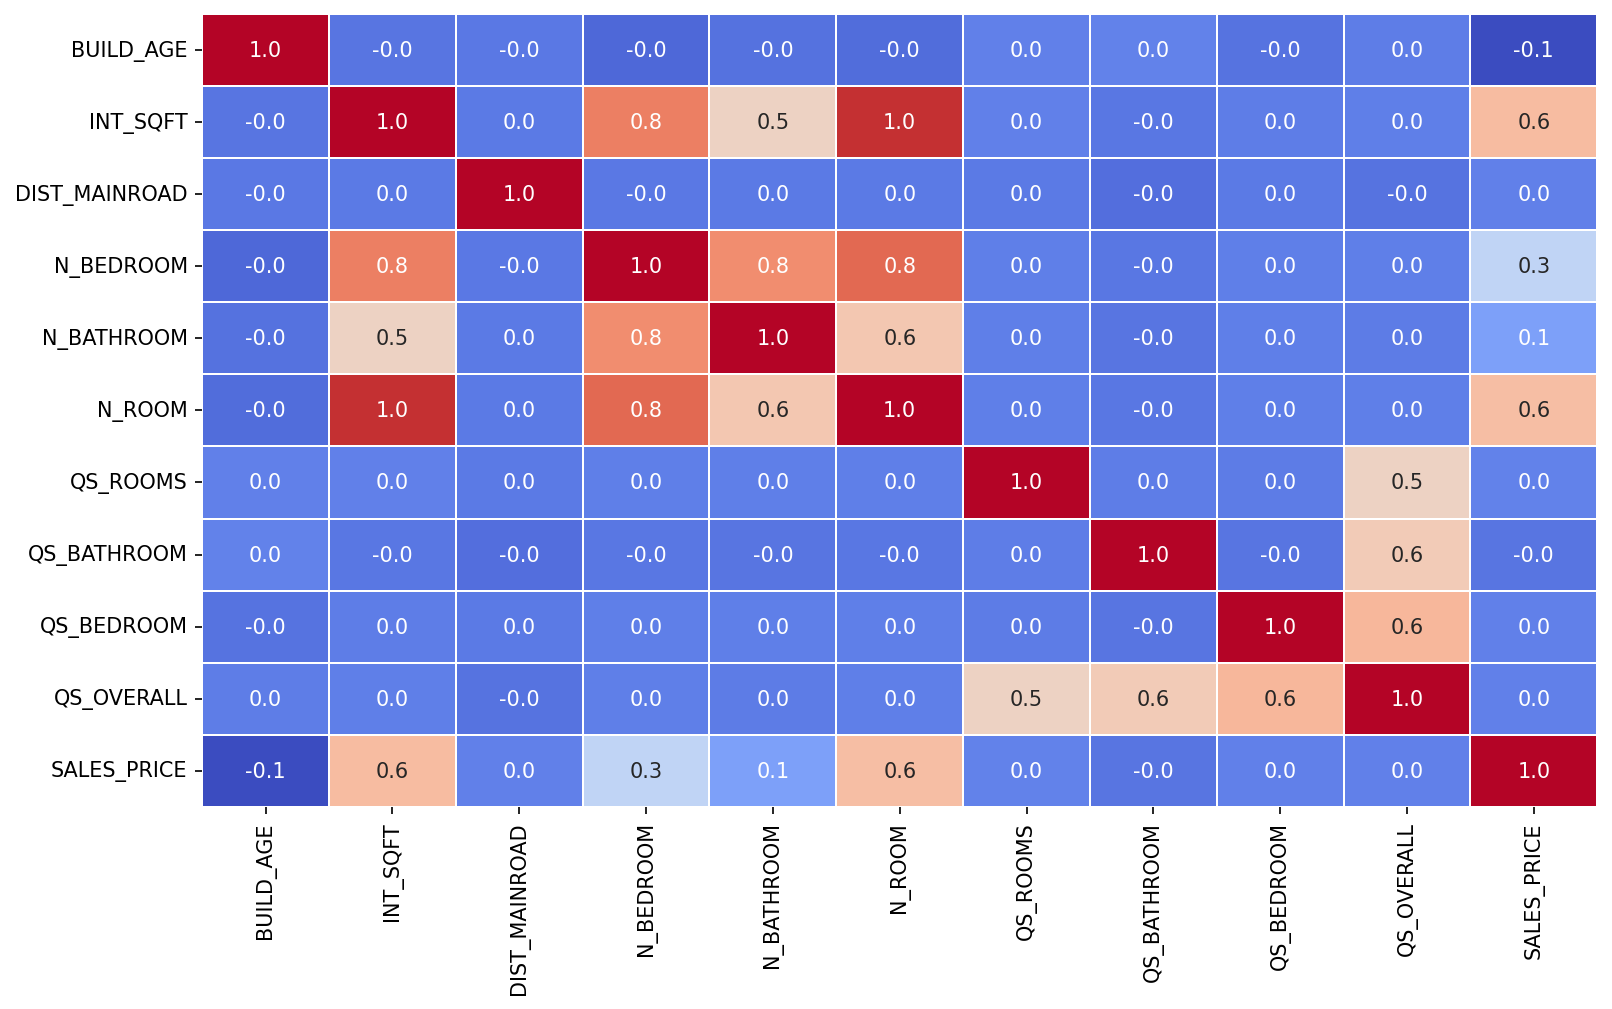

In [185]:
#Heatmap to get the linear relationship between different feautures.
plt.figure(figsize=(12,7), dpi=150)
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

### Interpretation of heatmap:
* There is a better linear relationship between **INT_SQFT** and **SALES_PRICE**.
* There is a better linear relationship between **N_ROOM** and **SALES_PRICE**.
* There is a slight linear relationship between **N_BEDROOM** and **SALES_PRICE**.




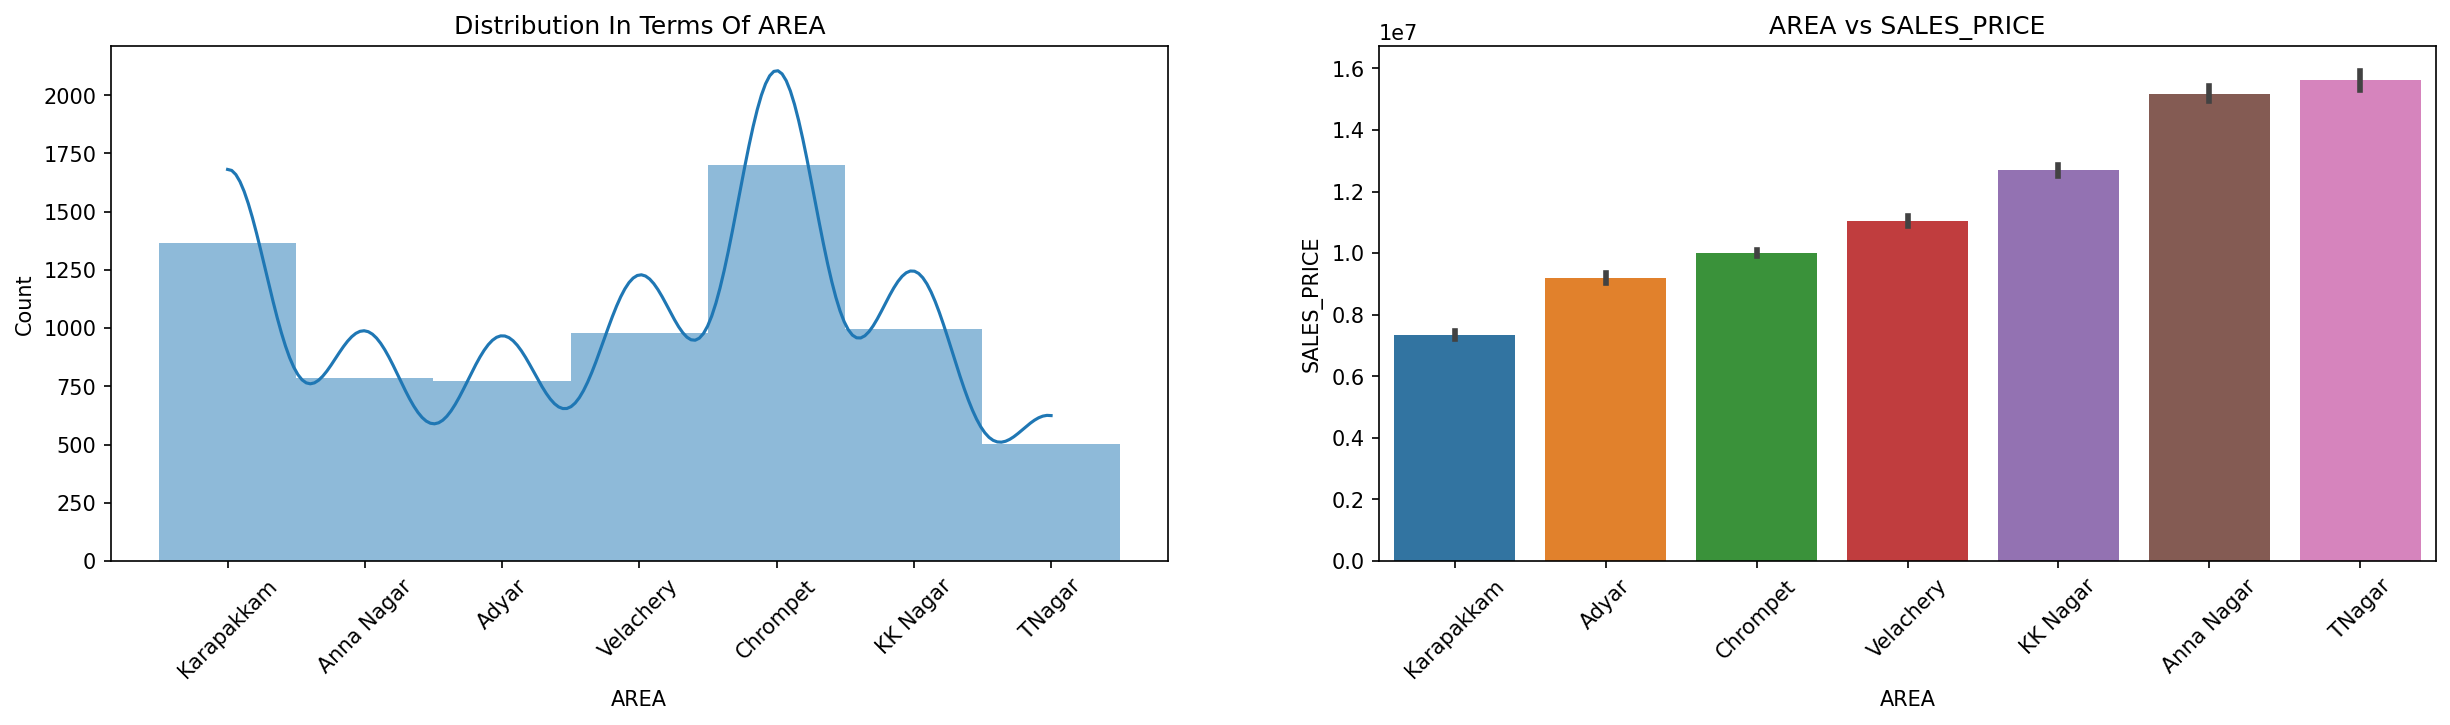

In [186]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.histplot(df['AREA'], linewidth=0,kde=True)
plt.xticks(rotation=45)
plt.title('Distribution In Terms Of AREA')

plt.subplot(2,2,2)
sns.barplot(x=df['AREA'],y=df['SALES_PRICE'],order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=45)
plt.title('AREA vs SALES_PRICE')

plt.show()

### Interpretation:
* **Chrompet** and **Karapakkam** have more number of distribution of houses compared to other areas.
* There is a good linear relationship between **AREA** and **SALES_PRICE**, so we can follow the label encoding here.
* **SALES_PRICE** is least in **Karapakkam** and high in **TNagar**.

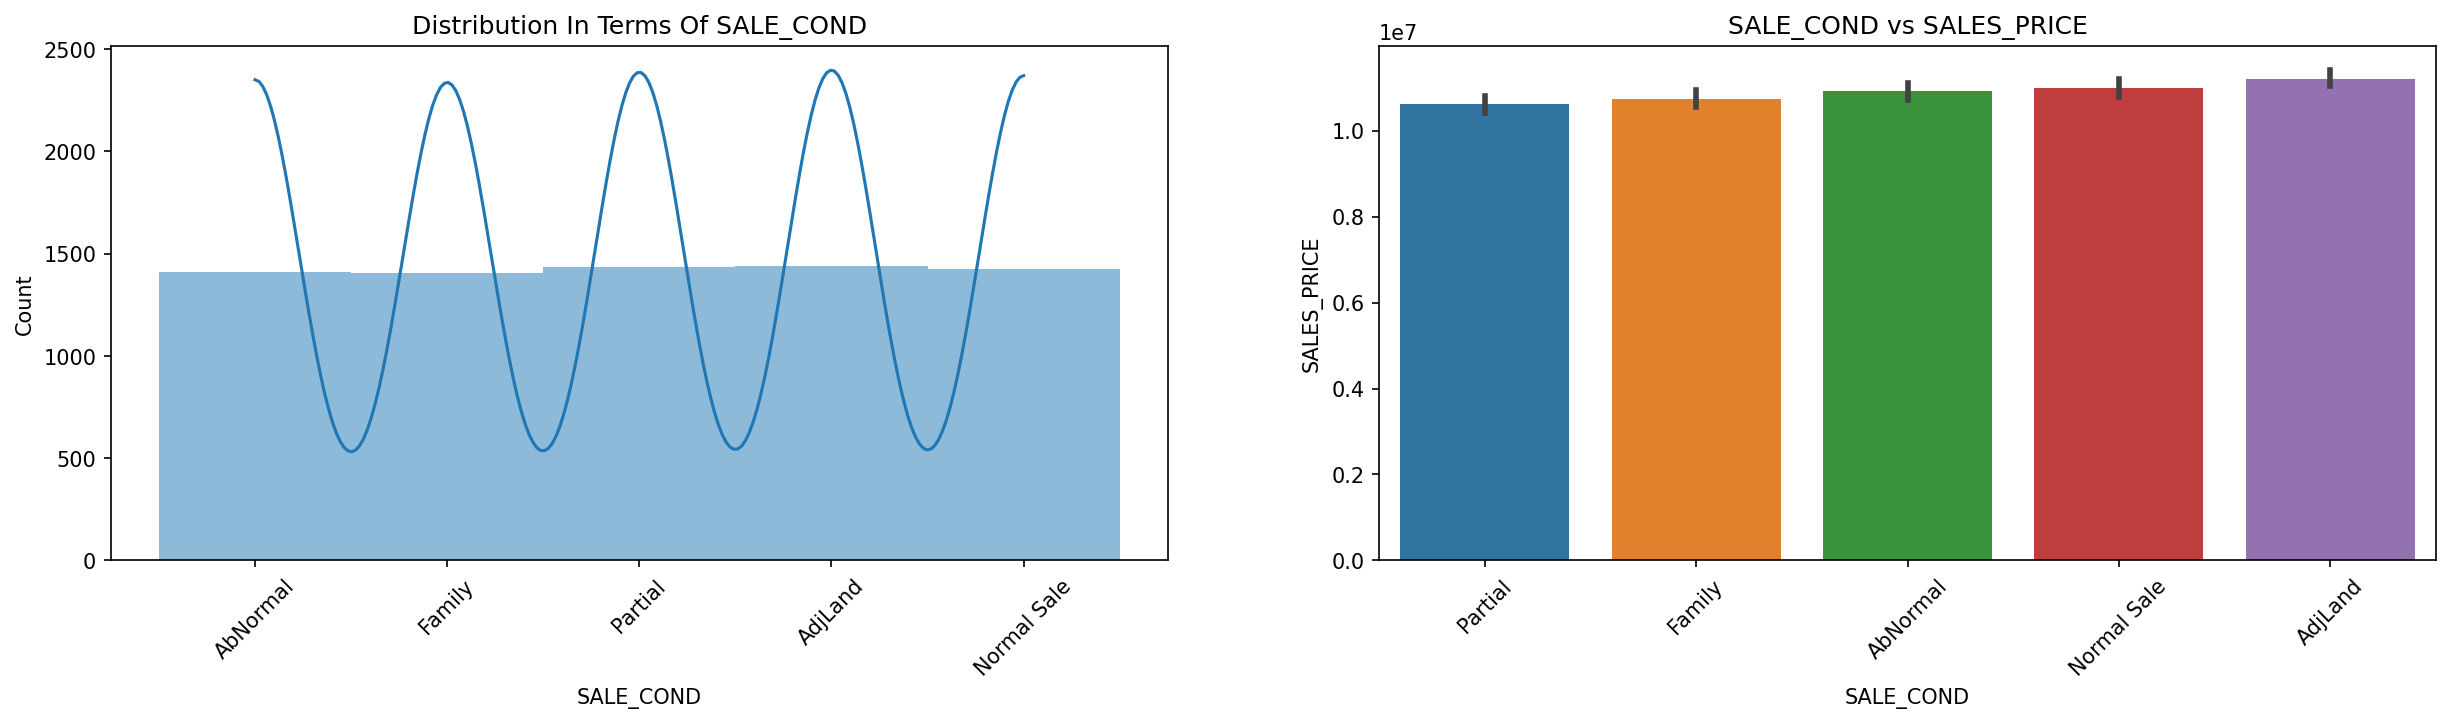

In [187]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.histplot(df['SALE_COND'], linewidth=0,kde=True)
plt.xticks(rotation=45)
plt.title('Distribution In Terms Of SALE_COND')

plt.subplot(2,2,2)
sns.barplot(x=df['SALE_COND'],y=df['SALES_PRICE'],order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.xticks(rotation=45)
plt.title('SALE_COND vs SALES_PRICE')

plt.show()

### Interpretation:
* More or less equally distributed.
* There is a very slight linear relationship between **SALE_COND** and **SALES_Price**.
* As relationship is very negligible we can drop this feauture .

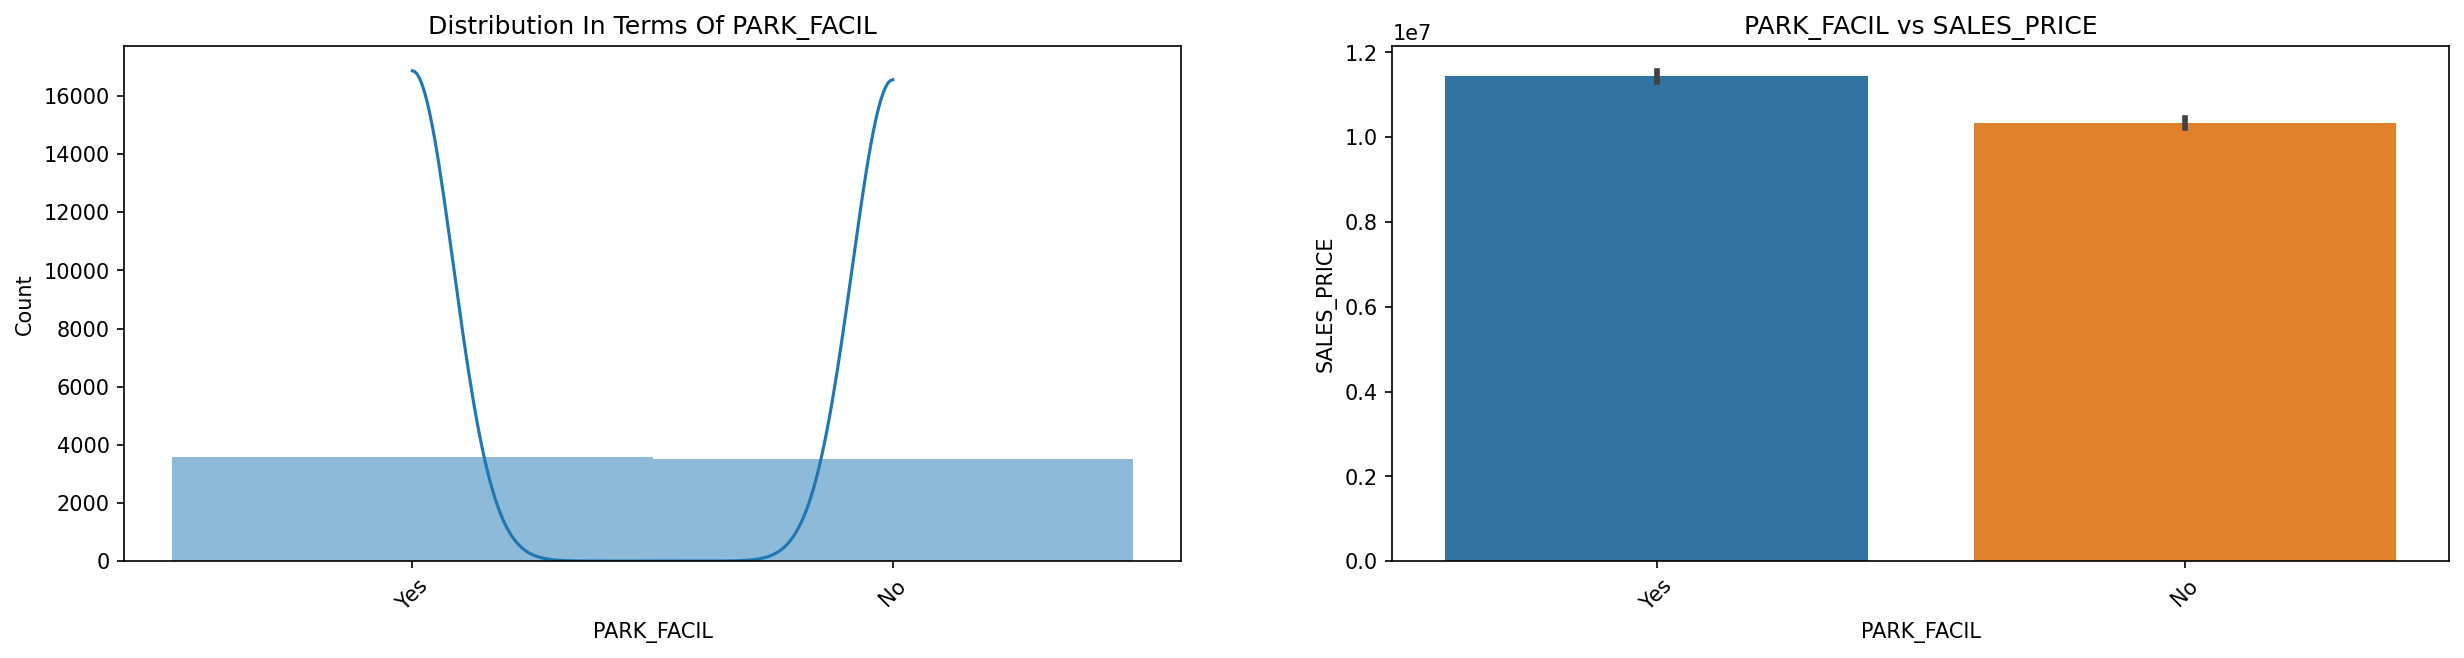

In [188]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.histplot(df['PARK_FACIL'], linewidth=0,kde=True)
plt.xticks(rotation=45)
plt.title('Distribution In Terms Of PARK_FACIL')

plt.subplot(2,2,2)
sns.barplot(x=df['PARK_FACIL'],y=df['SALES_PRICE'])
plt.xticks(rotation=45)
plt.title('PARK_FACIL vs SALES_PRICE')

plt.show()

### Interpretation:
* More or less equally distributed.
* There is a good linear relationship between **PARK_FACIL** and **SALES_PRICE**.
* we can use the label encoding here.

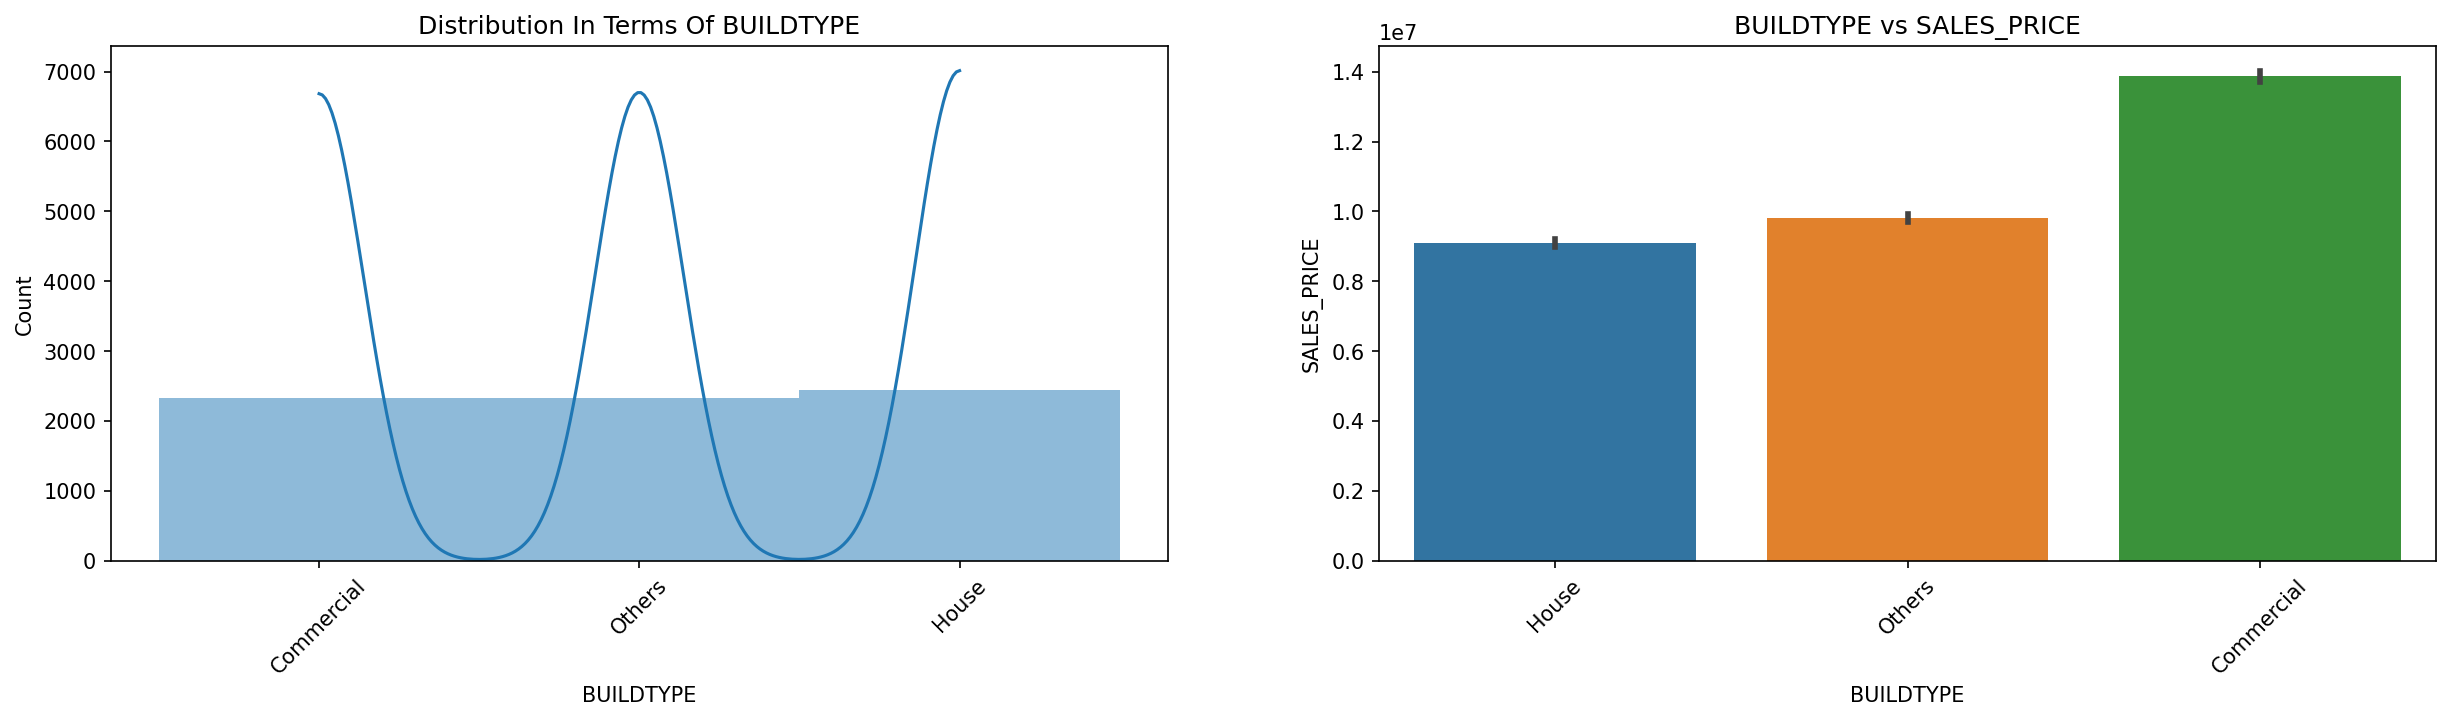

In [189]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.histplot(df['BUILDTYPE'], linewidth=0,kde=True)
plt.xticks(rotation=45)
plt.title('Distribution In Terms Of BUILDTYPE')

plt.subplot(2,2,2)
sns.barplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'],order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=45)
plt.title('BUILDTYPE vs SALES_PRICE')

plt.show()

### Interpretation:
* More or less equally distributed.
* There is no linear relationship between **BUILDTYPE** and **SALES_PRICE**.
* we can use the onehot encoding here.

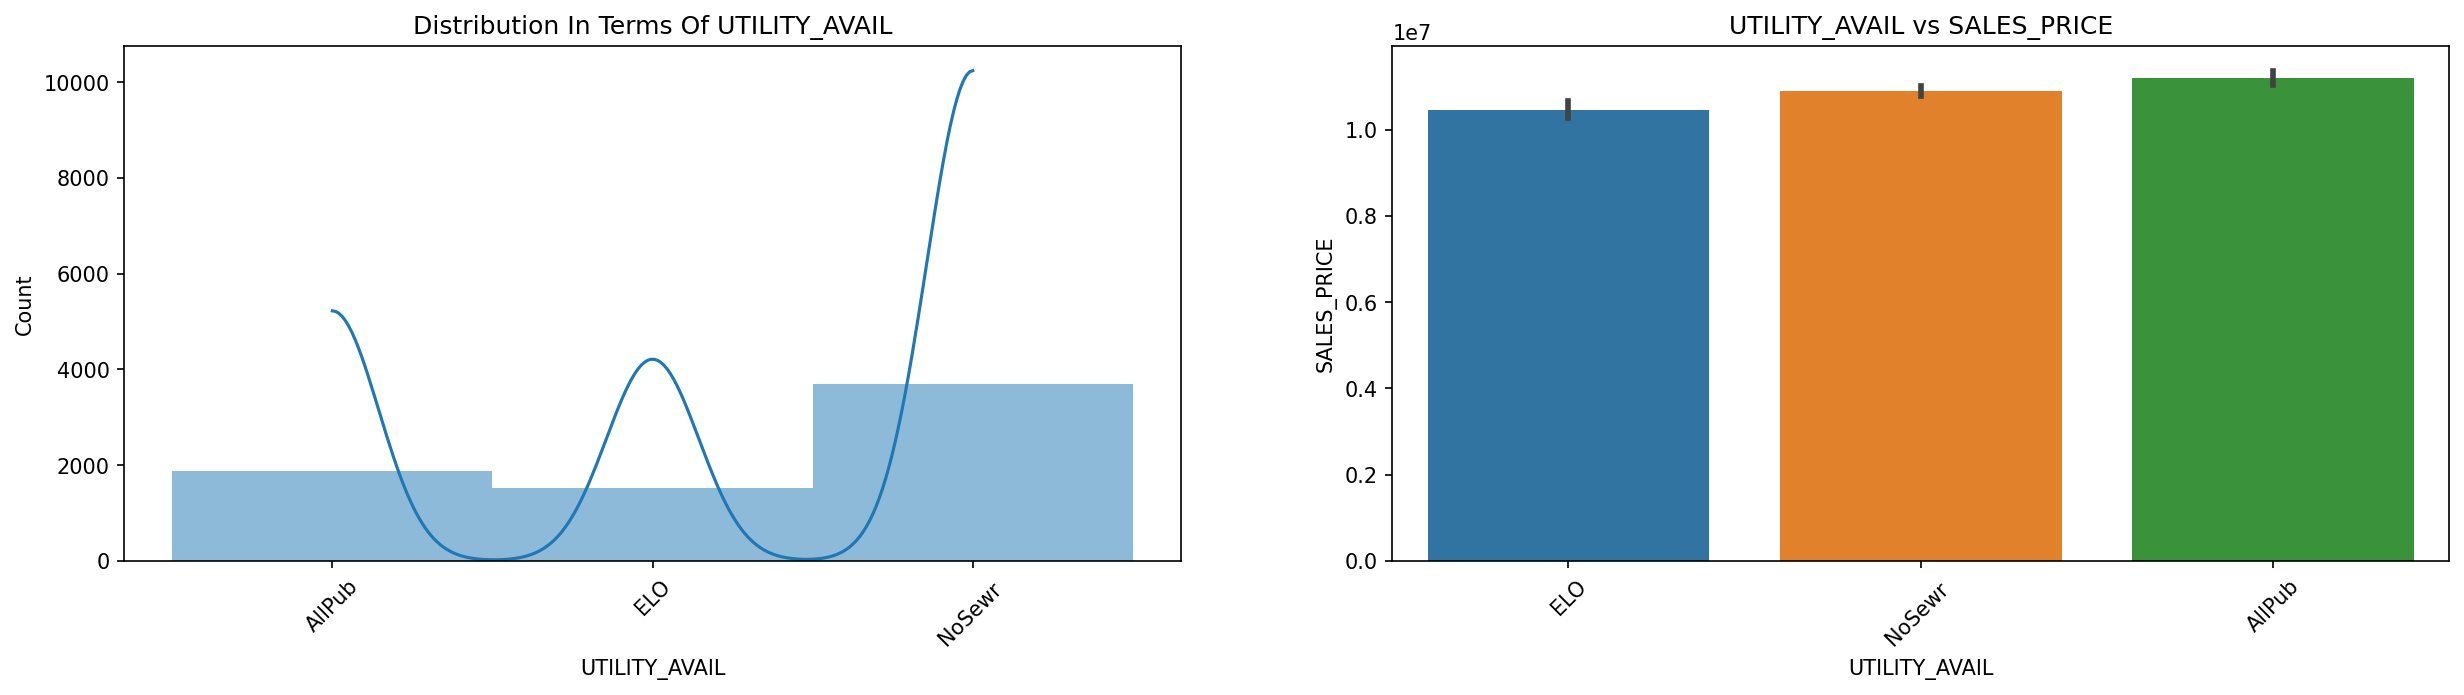

In [190]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.histplot(df['UTILITY_AVAIL'], linewidth=0,kde=True)
plt.xticks(rotation=45)
plt.title('Distribution In Terms Of UTILITY_AVAIL')

plt.subplot(2,2,2)
sns.barplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'],order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=45)
plt.title('UTILITY_AVAIL vs SALES_PRICE')

plt.show()

### Interpretation:
* NoSewr property has more distribution.
* There is a good linear relationship between **UTILITY_AVAIL** and **SALES_PRICE**.
* we can use the label encoding here.

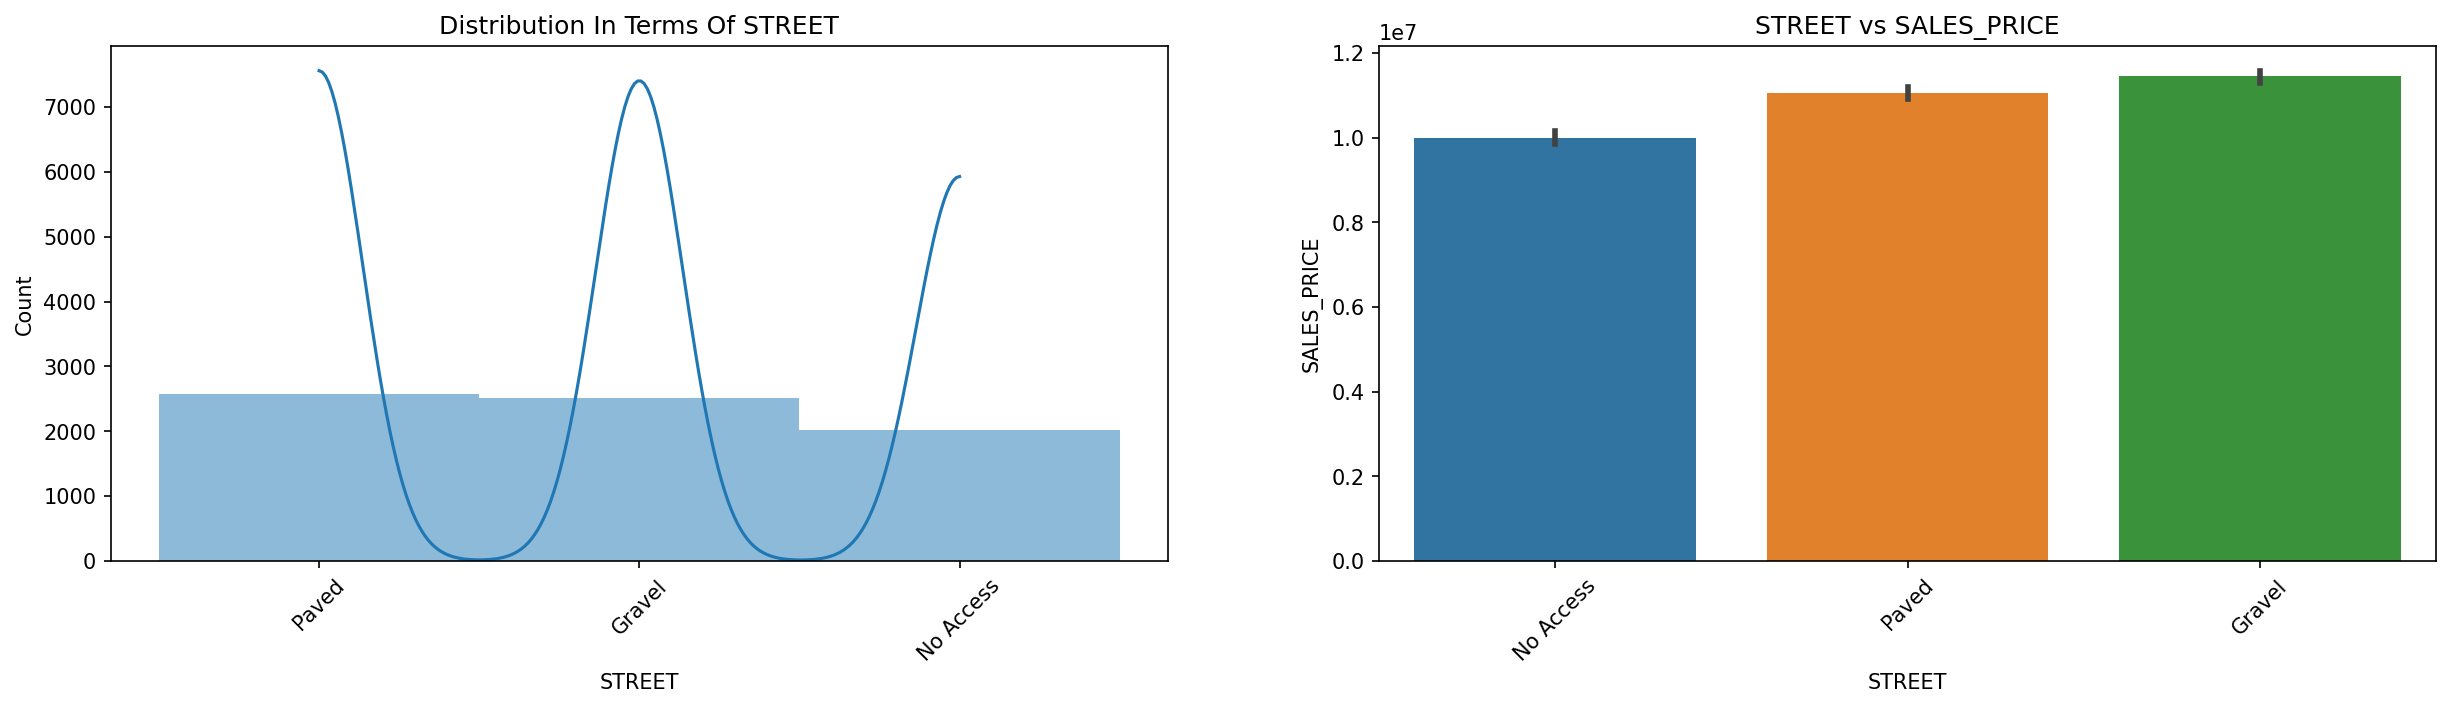

In [191]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.histplot(df['STREET'], linewidth=0,kde=True)
plt.xticks(rotation=45)
plt.title('Distribution In Terms Of STREET')

plt.subplot(2,2,2)
sns.barplot(x=df['STREET'],y=df['SALES_PRICE'],order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=45)
plt.title('STREET vs SALES_PRICE')

plt.show()

### Interpretation:
* More or less equally distributed.
* There is a good linear relationship between **STREET** and **SALES_PRICE**.
* we can use the label encoding here.

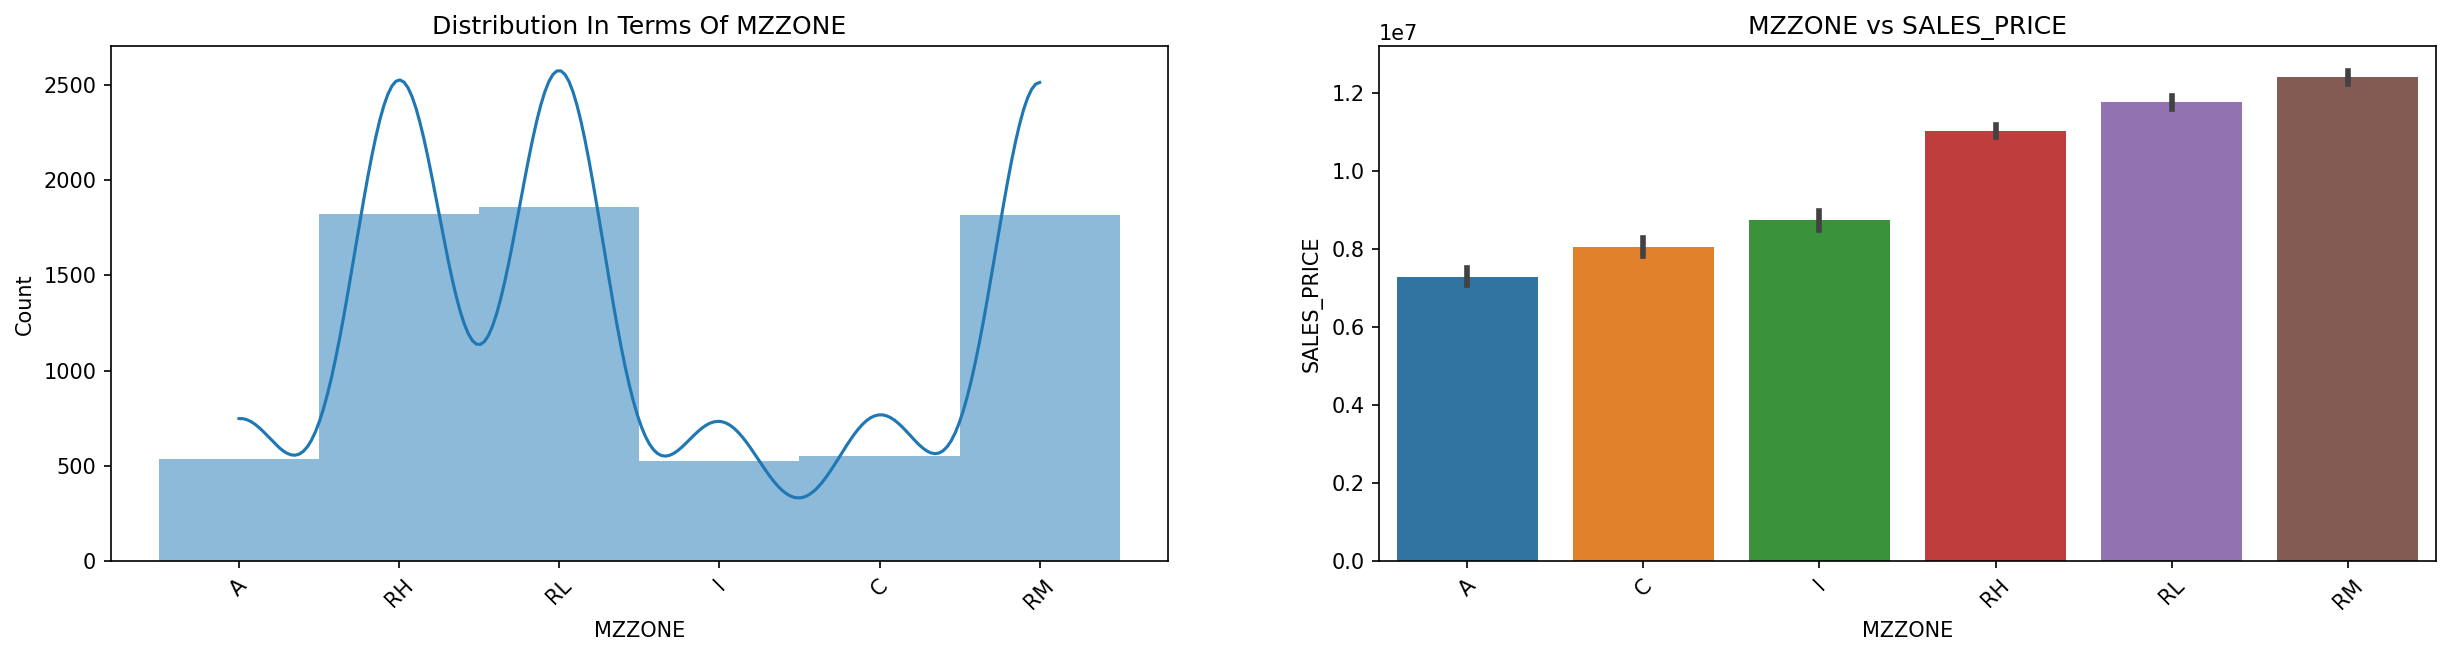

In [192]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.histplot(df['MZZONE'], linewidth=0,kde=True)
plt.xticks(rotation=45)
plt.title('Distribution In Terms Of MZZONE')

plt.subplot(2,2,2)
sns.barplot(x=df['MZZONE'],y=df['SALES_PRICE'],order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=45)
plt.title('MZZONE vs SALES_PRICE')

plt.show()

### Interpretation:
* More or less equally distributed.
* There is a good linear relationship between **MZZONE** and **SALES_PRICE** (but from I to RH there is a jump).
* we can use the label encoding here (so we have to skip one value from I to H).

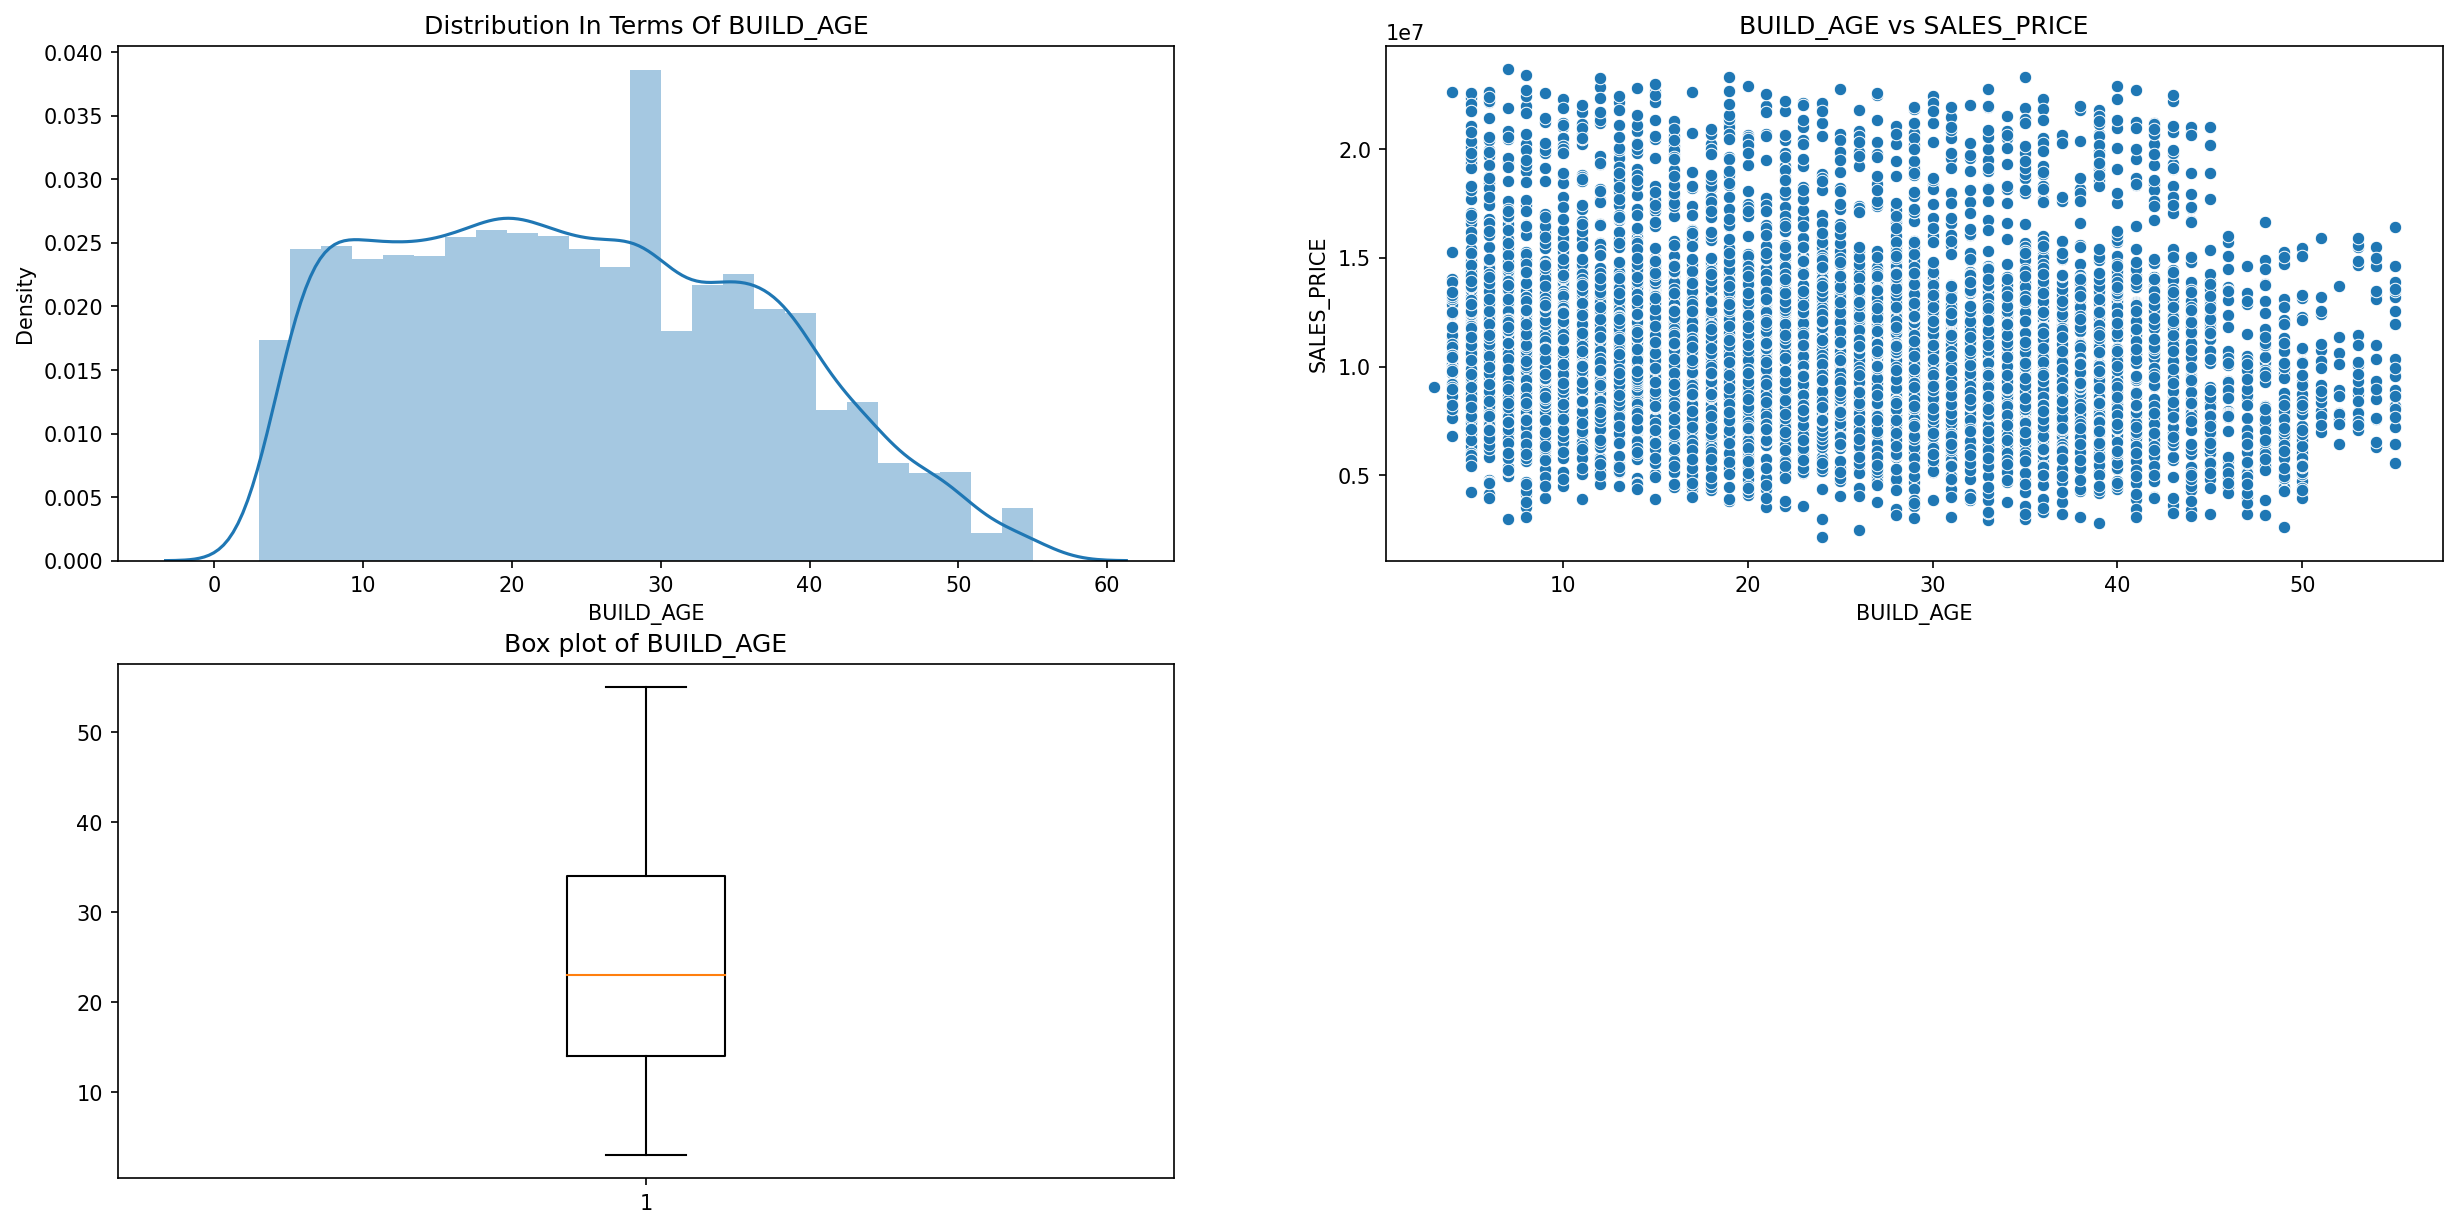

The corr between feauture and target : -0.11884215700121235


In [193]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.distplot(df['BUILD_AGE'])
plt.title('Distribution In Terms Of BUILD_AGE')

plt.subplot(2,2,2)
sns.scatterplot(data=df,x=df['BUILD_AGE'],y=df['SALES_PRICE'])
plt.title('BUILD_AGE vs SALES_PRICE')

plt.subplot(2,2,3)
plt.boxplot(df['BUILD_AGE'])
plt.title('Box plot of BUILD_AGE')

plt.show()

cor=df['BUILD_AGE'].corr(df['SALES_PRICE'])
print('The corr between feauture and target :',cor)

### Interpretation:
* Most densely distributed property are between 0-40 years of age.
* There is a linear relationship between **BUILD_AGE** and **SALES_PRICE**.
* There is no outlier in the **BUILD_AGE** feauture.

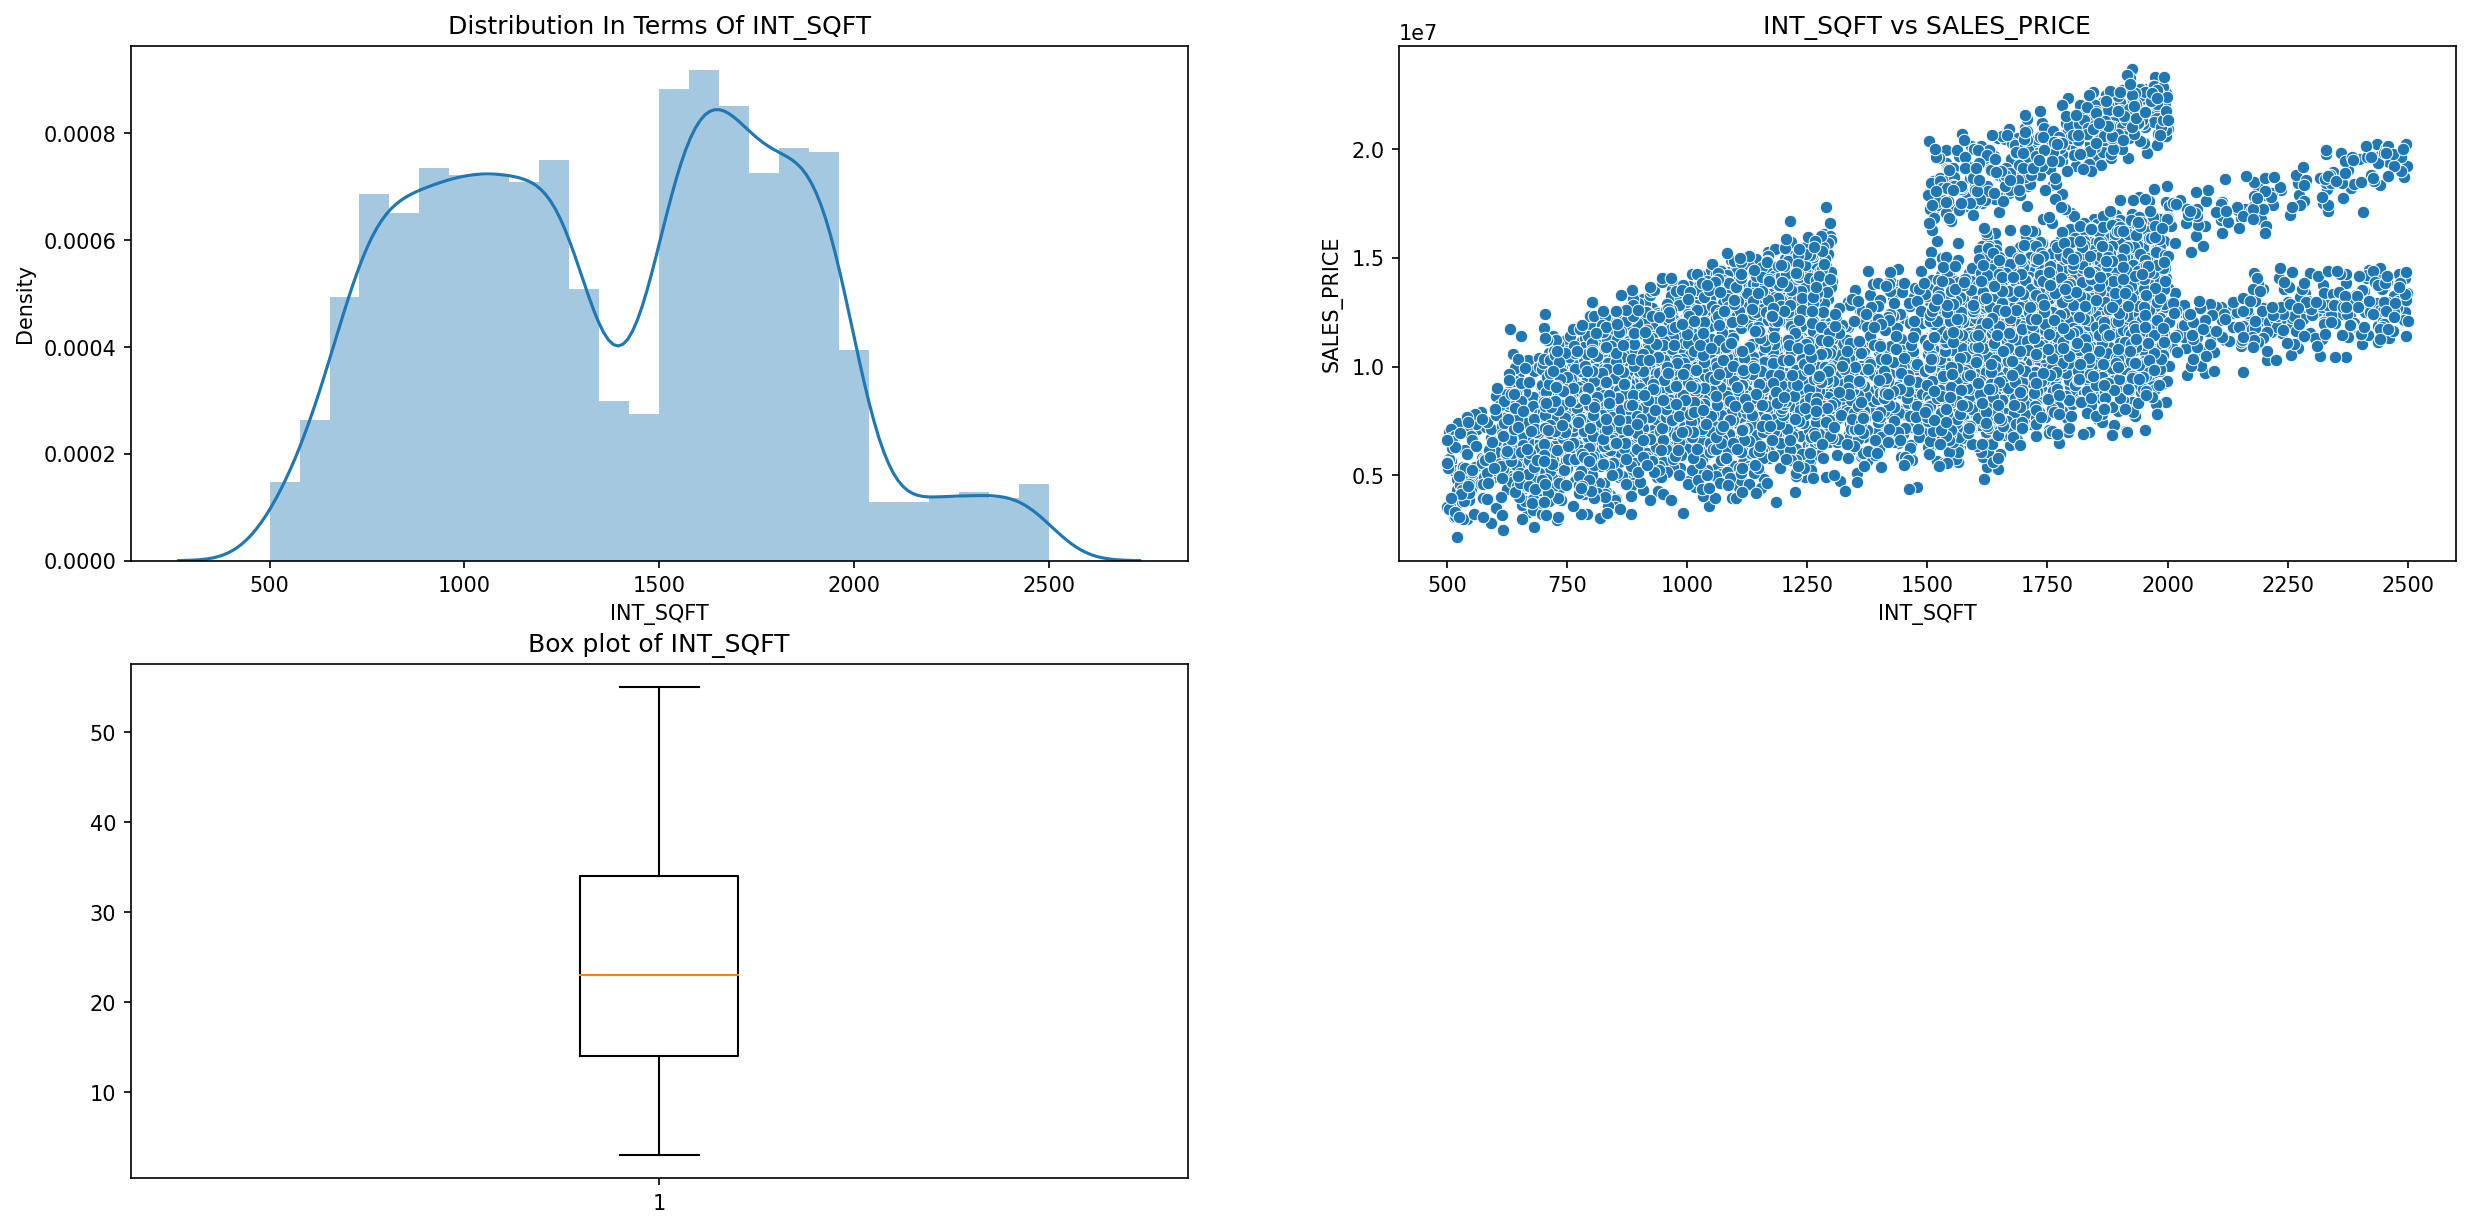

The corr between feauture and target : 0.6121248760738686


In [194]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.distplot(df['INT_SQFT'])
plt.title('Distribution In Terms Of INT_SQFT')

plt.subplot(2,2,2)
sns.scatterplot(data=df,x=df['INT_SQFT'],y=df['SALES_PRICE'])
plt.title('INT_SQFT vs SALES_PRICE')

plt.subplot(2,2,3)
plt.boxplot(df['BUILD_AGE'])
plt.title('Box plot of INT_SQFT')

plt.show()

cor=df['INT_SQFT'].corr(df['SALES_PRICE'])
print('The corr between feauture and target :',cor)

### Interpretation:
* There is a good linear relationship between **INT_SQFT** and **SALES_PRICE**.
* There is no outlier in the **INT_SQFT** feauture.

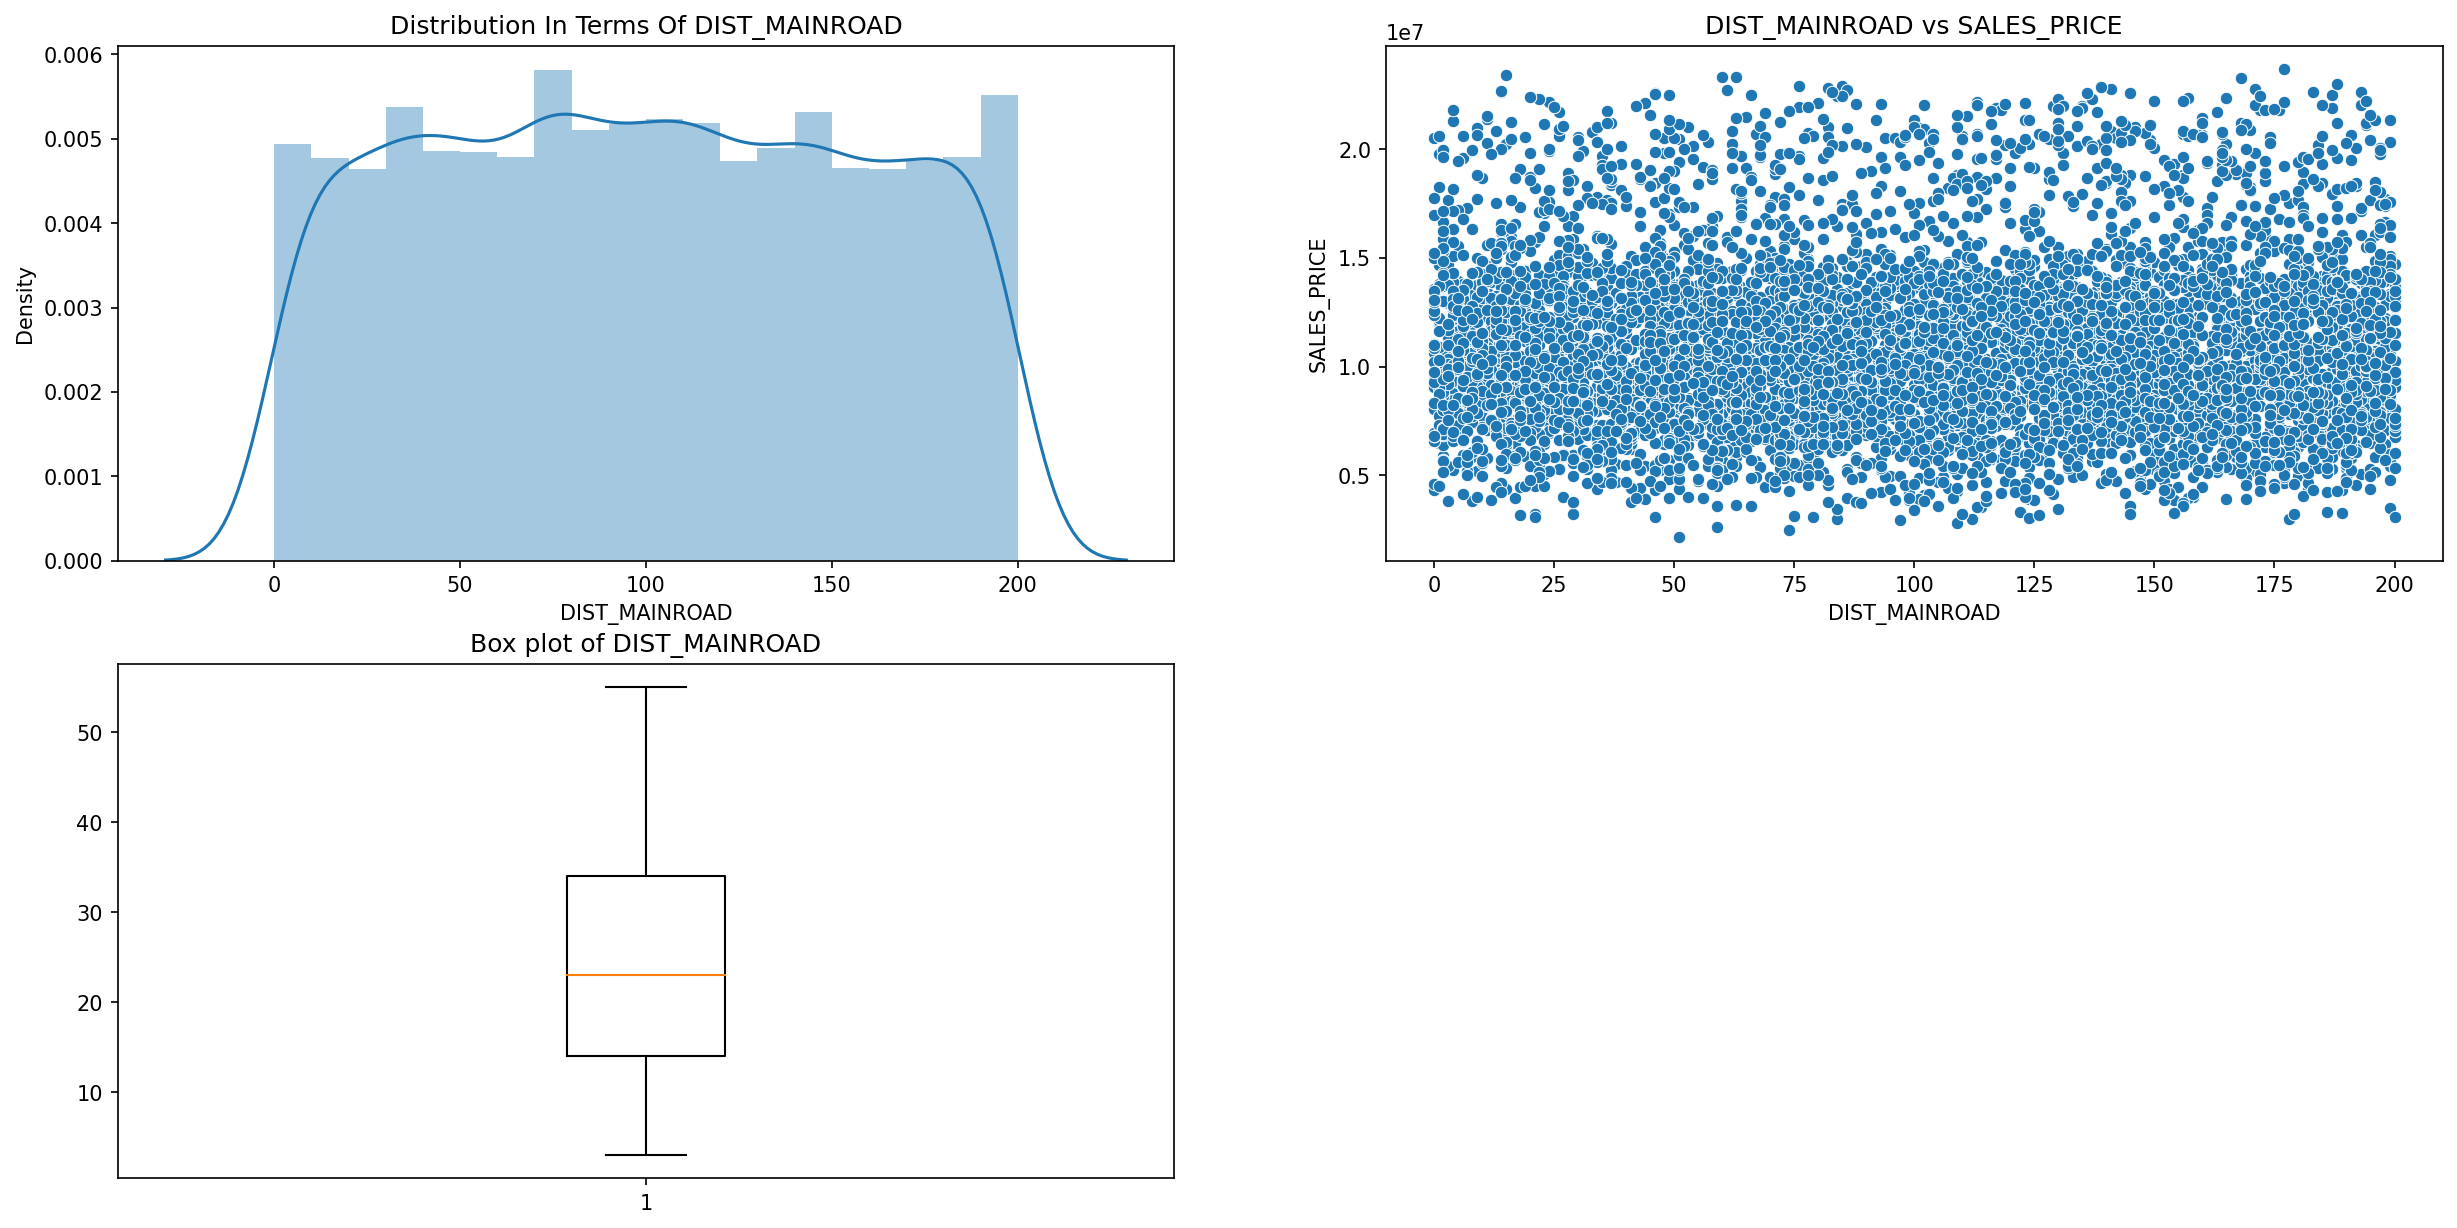

The corr between feauture and target : 0.018783412253401598


In [195]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.distplot(df['DIST_MAINROAD'])
plt.title('Distribution In Terms Of DIST_MAINROAD')

plt.subplot(2,2,2)
sns.scatterplot(data=df,x=df['DIST_MAINROAD'],y=df['SALES_PRICE'])
plt.title('DIST_MAINROAD vs SALES_PRICE')

plt.subplot(2,2,3)
plt.boxplot(df['BUILD_AGE'])
plt.title('Box plot of DIST_MAINROAD')

plt.show()

cor=df['DIST_MAINROAD'].corr(df['SALES_PRICE'])
print('The corr between feauture and target :',cor)

### Interpretation:
* More or less property are equally distributed .
* There is no linear relationship between **DIST_MAINROAD** and **SALES_PRICE**.
* There is no outlier in the **DIST_MAINROAD** feauture.

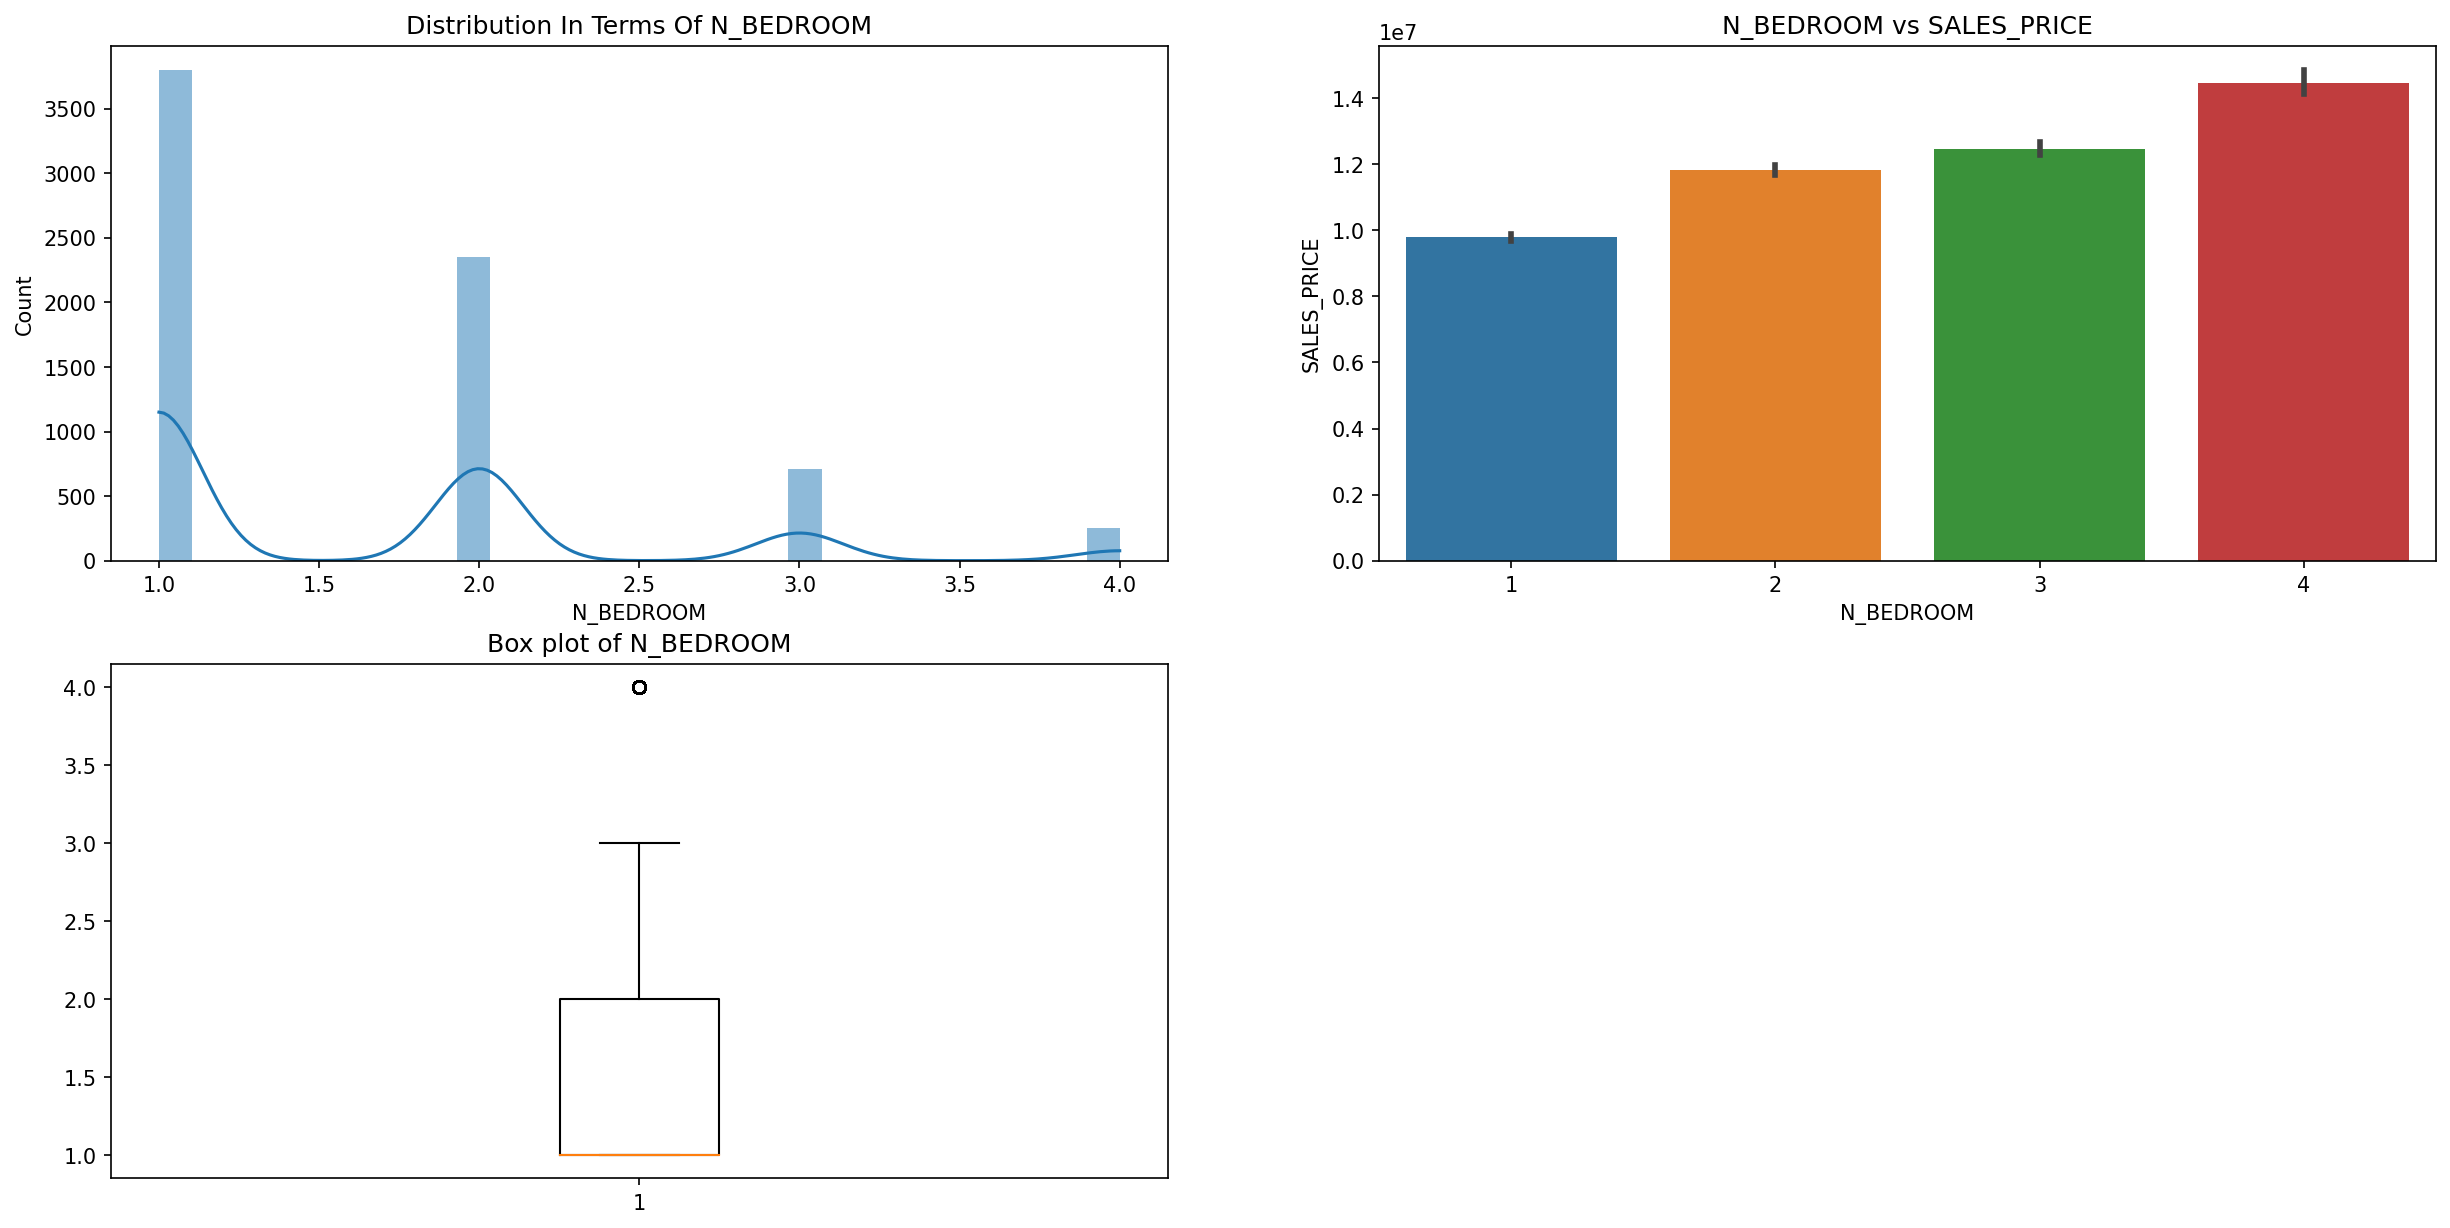

The corr between feauture and target : 0.3309868165825562


In [196]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.histplot(df['N_BEDROOM'], linewidth=0,kde=True)
plt.title('Distribution In Terms Of N_BEDROOM')

plt.subplot(2,2,2)
sns.barplot(x=df['N_BEDROOM'],y=df['SALES_PRICE'],order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('N_BEDROOM vs SALES_PRICE')

plt.subplot(2,2,3)
plt.boxplot(df['N_BEDROOM'])
plt.title('Box plot of N_BEDROOM')

plt.show()

cor=df['N_BEDROOM'].corr(df['SALES_PRICE'])
print('The corr between feauture and target :',cor)

### Interpretation:
* Most of the property has 1 bedroom and 2 berooms.
* There is a linear relationship between **N_BEDROOM** and **SALES_PRICE**.
* 4 is a outlier here, but we should not remove it for this business case.

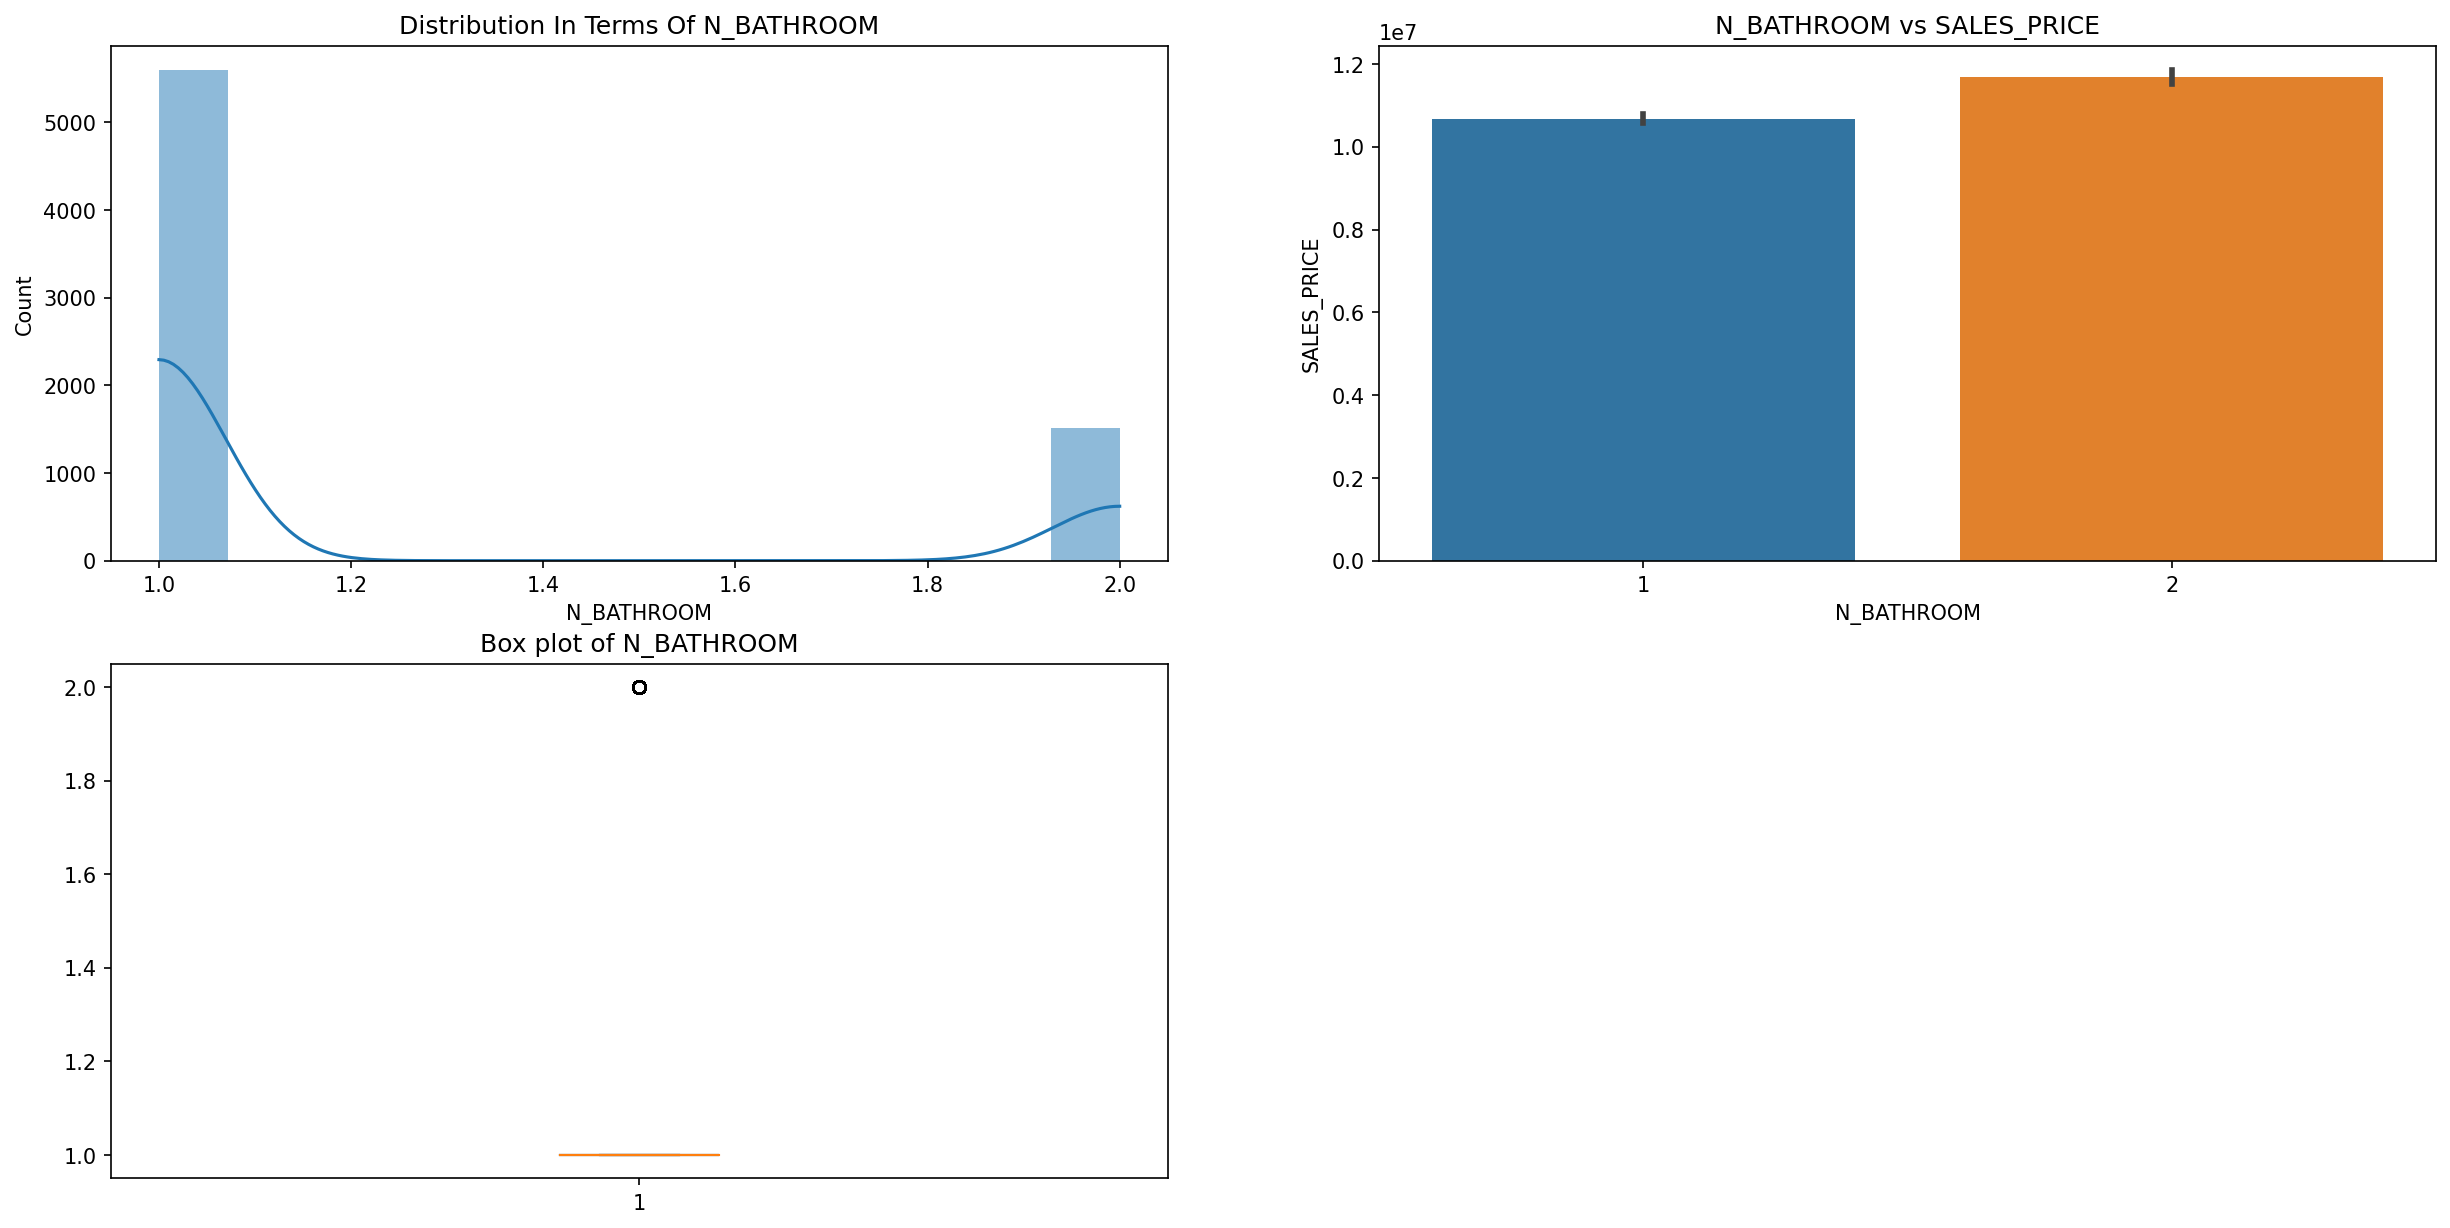

The corr between feauture and target : 0.10883438753787143


In [197]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.histplot(df['N_BATHROOM'], linewidth=0,kde=True)
plt.title('Distribution In Terms Of N_BATHROOM')

plt.subplot(2,2,2)
sns.barplot(x=df['N_BATHROOM'],y=df['SALES_PRICE'],order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title('N_BATHROOM vs SALES_PRICE')

plt.subplot(2,2,3)
plt.boxplot(df['N_BATHROOM'])
plt.title('Box plot of N_BATHROOM')

plt.show()

cor=df['N_BATHROOM'].corr(df['SALES_PRICE'])
print('The corr between feauture and target :',cor)

### Interpretation:
* Most of the property has 1 bathroom.
* There is a linear relationship between **N_BATHROOM** and **SALES_PRICE**.
* 2 is a outlier here, but we should not remove it for this business case.

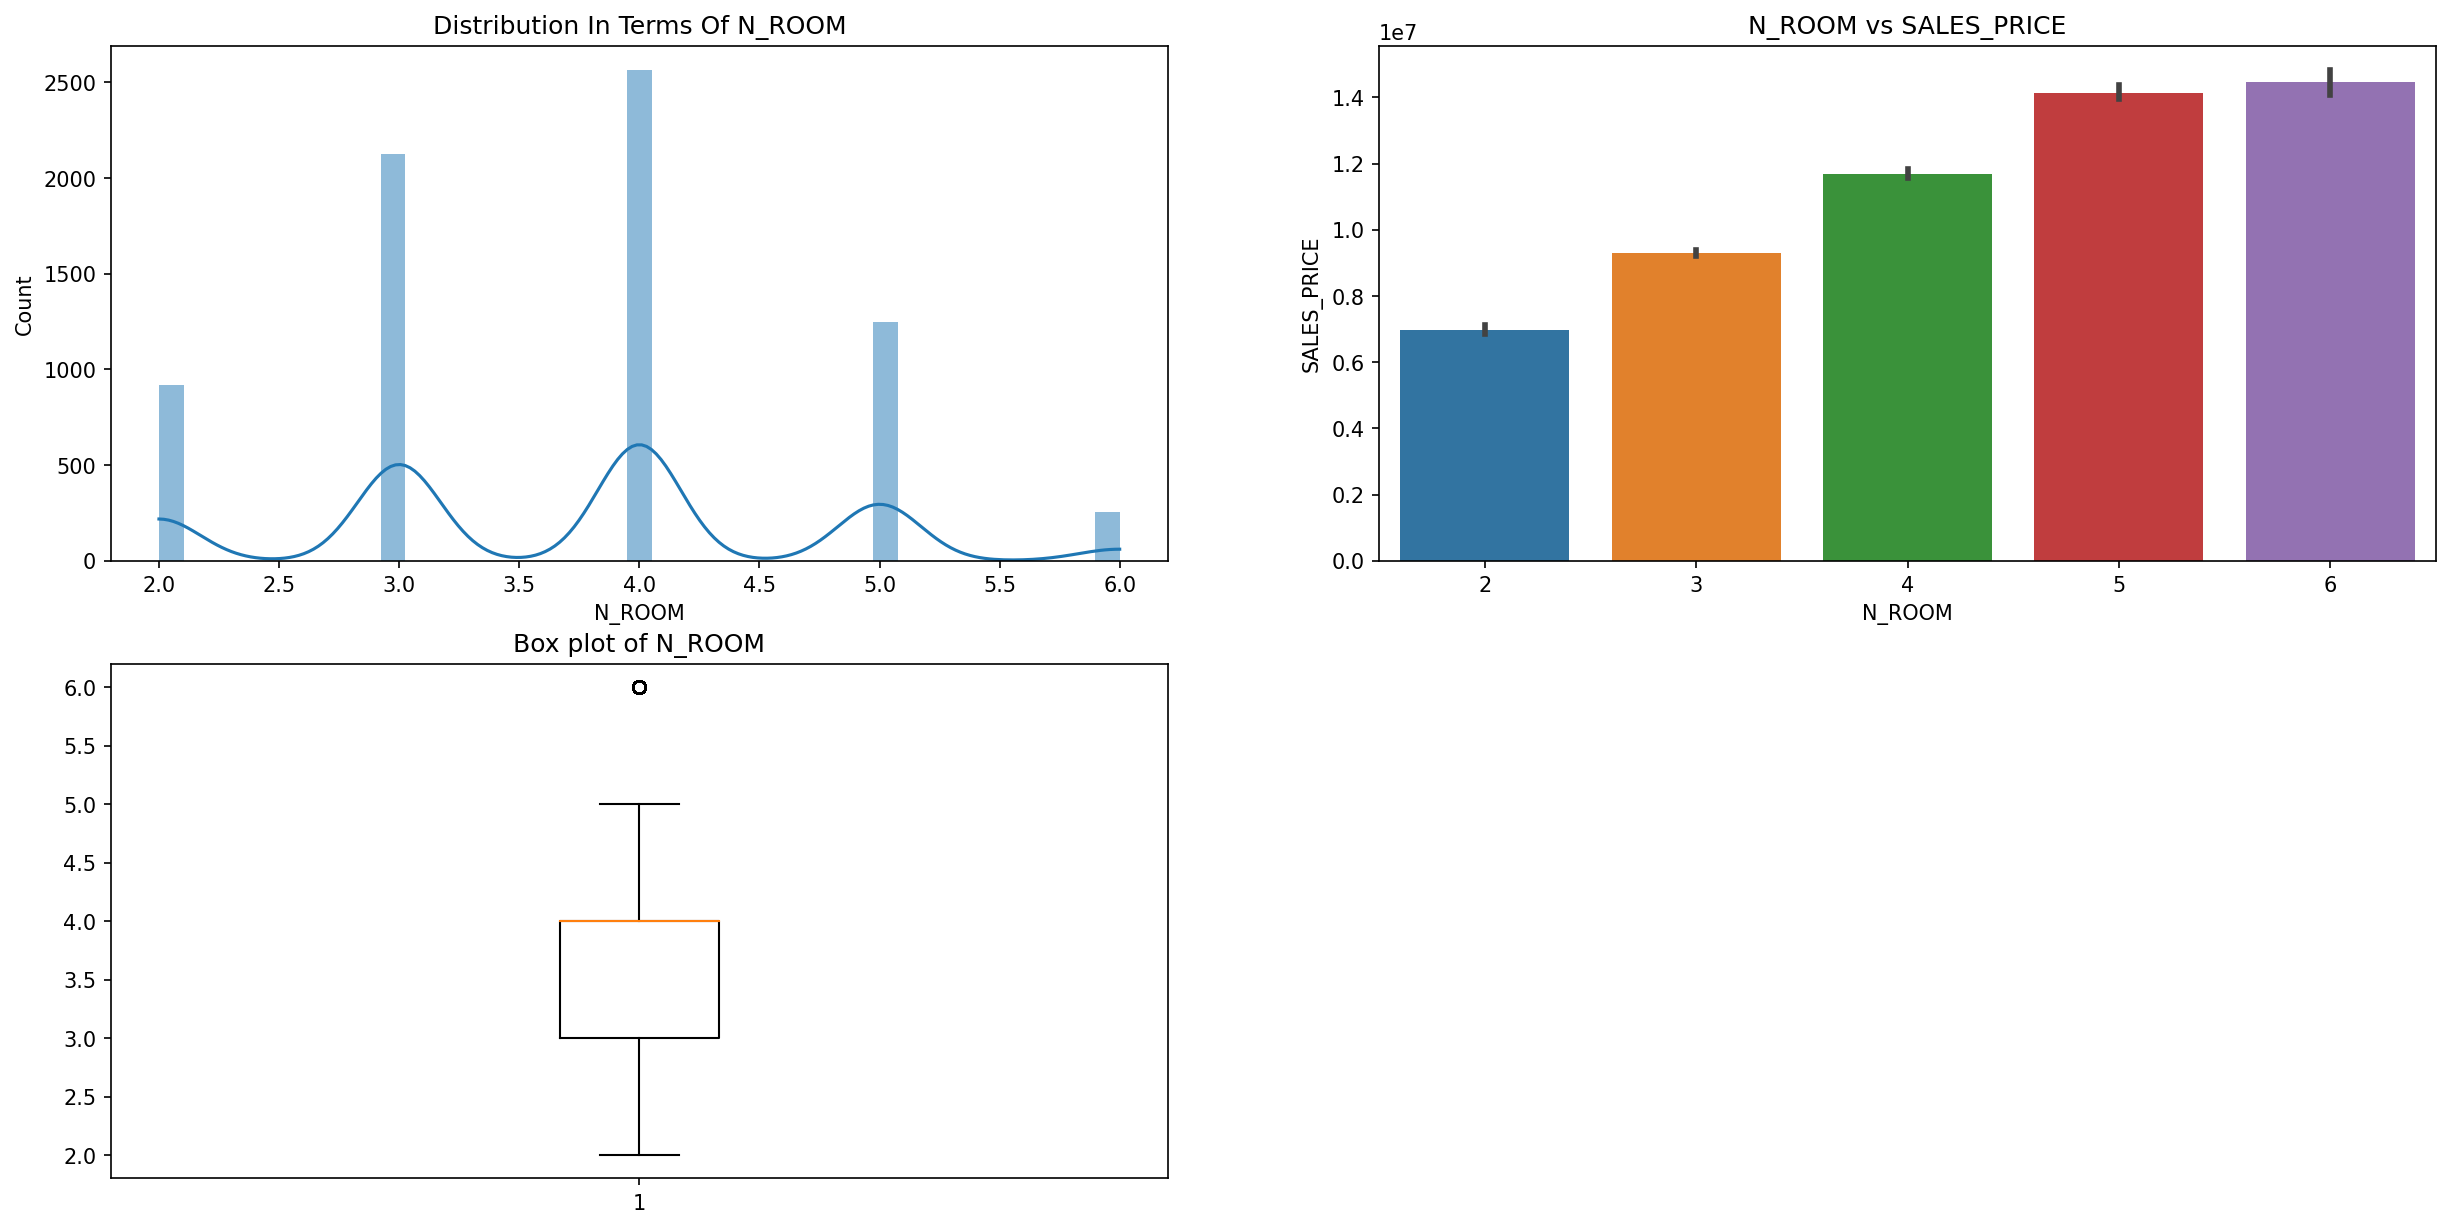

The corr between feauture and target : 0.6027596075987967


In [198]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.histplot(df['N_ROOM'], linewidth=0,kde=True)
plt.title('Distribution In Terms Of N_ROOM')

plt.subplot(2,2,2)
sns.barplot(x=df['N_ROOM'],y=df['SALES_PRICE'],order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

plt.subplot(2,2,3)
plt.boxplot(df['N_ROOM'])
plt.title('Box plot of N_ROOM')

plt.show()

cor=df['N_ROOM'].corr(df['SALES_PRICE'])
print('The corr between feauture and target :',cor)

### Interpretation:
* Most of the property has 3,4,5 rooms.
* There is a linear relationship between **N_ROOM** and **SALES_PRICE**.
* 6 is a outlier here, but we should not remove it for this business case.

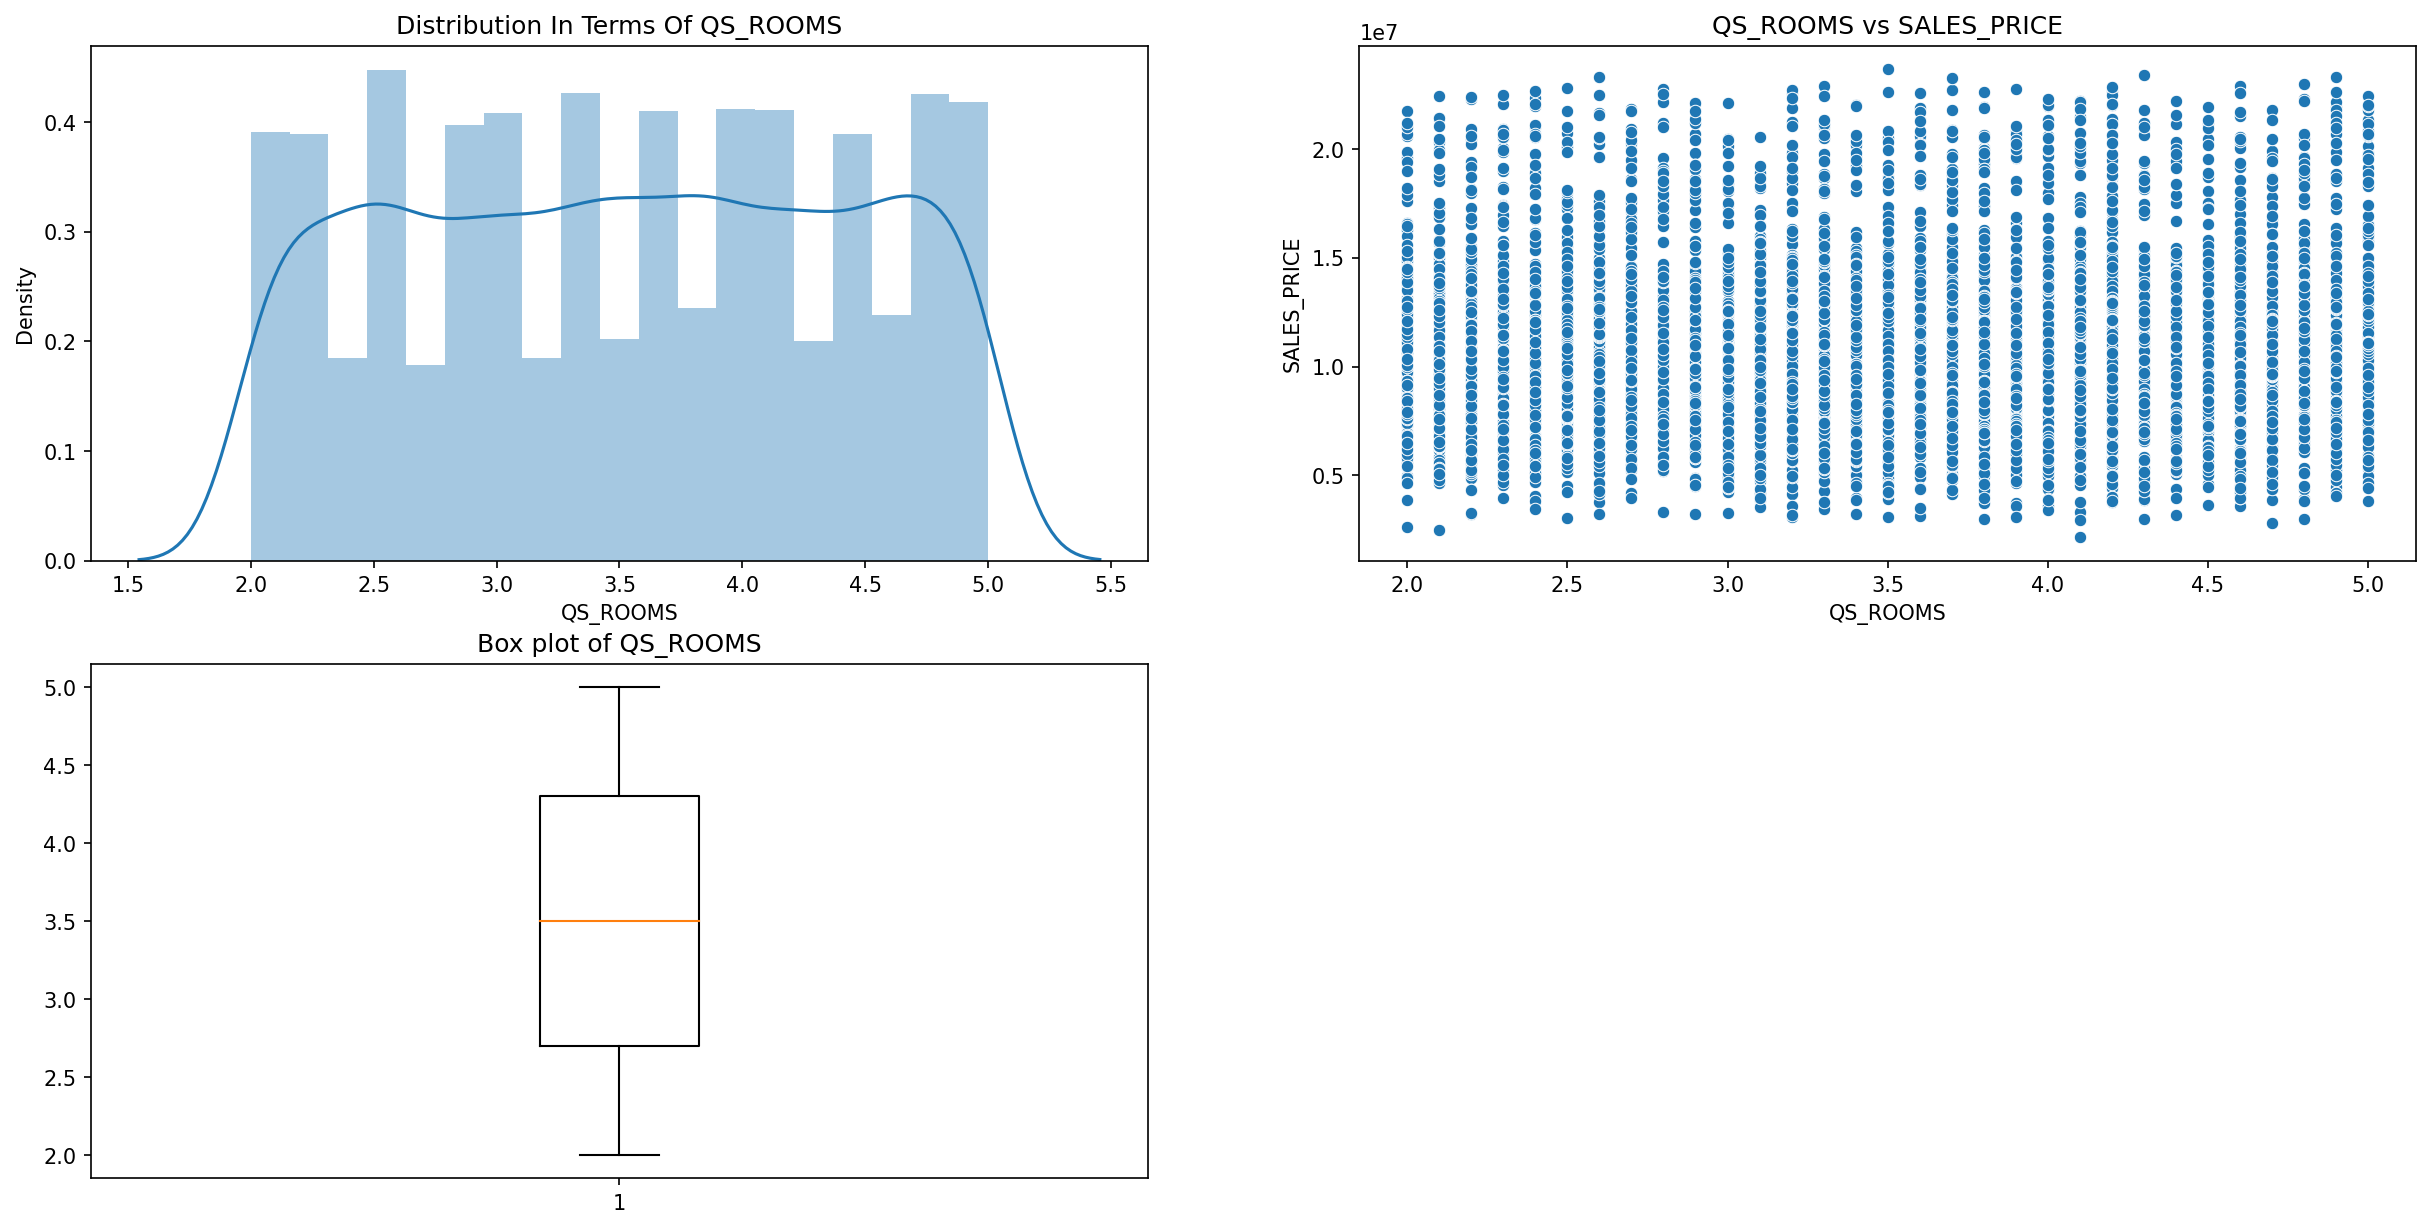

The corr between feauture and target : 0.02196740547164276


In [199]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.distplot(df['QS_ROOMS'])
plt.title('Distribution In Terms Of QS_ROOMS')

plt.subplot(2,2,2)
sns.scatterplot(data=df,x=df['QS_ROOMS'],y=df['SALES_PRICE'])
plt.title('QS_ROOMS vs SALES_PRICE')

plt.subplot(2,2,3)
plt.boxplot(df['QS_ROOMS'])
plt.title('Box plot of QS_ROOMS')

plt.show()

cor=df['QS_ROOMS'].corr(df['SALES_PRICE'])
print('The corr between feauture and target :',cor)

### Interpretation:
* There is no linear relationship between **QS_ROOMS** and **SALES_PRICE**.
* There is no outlier here.

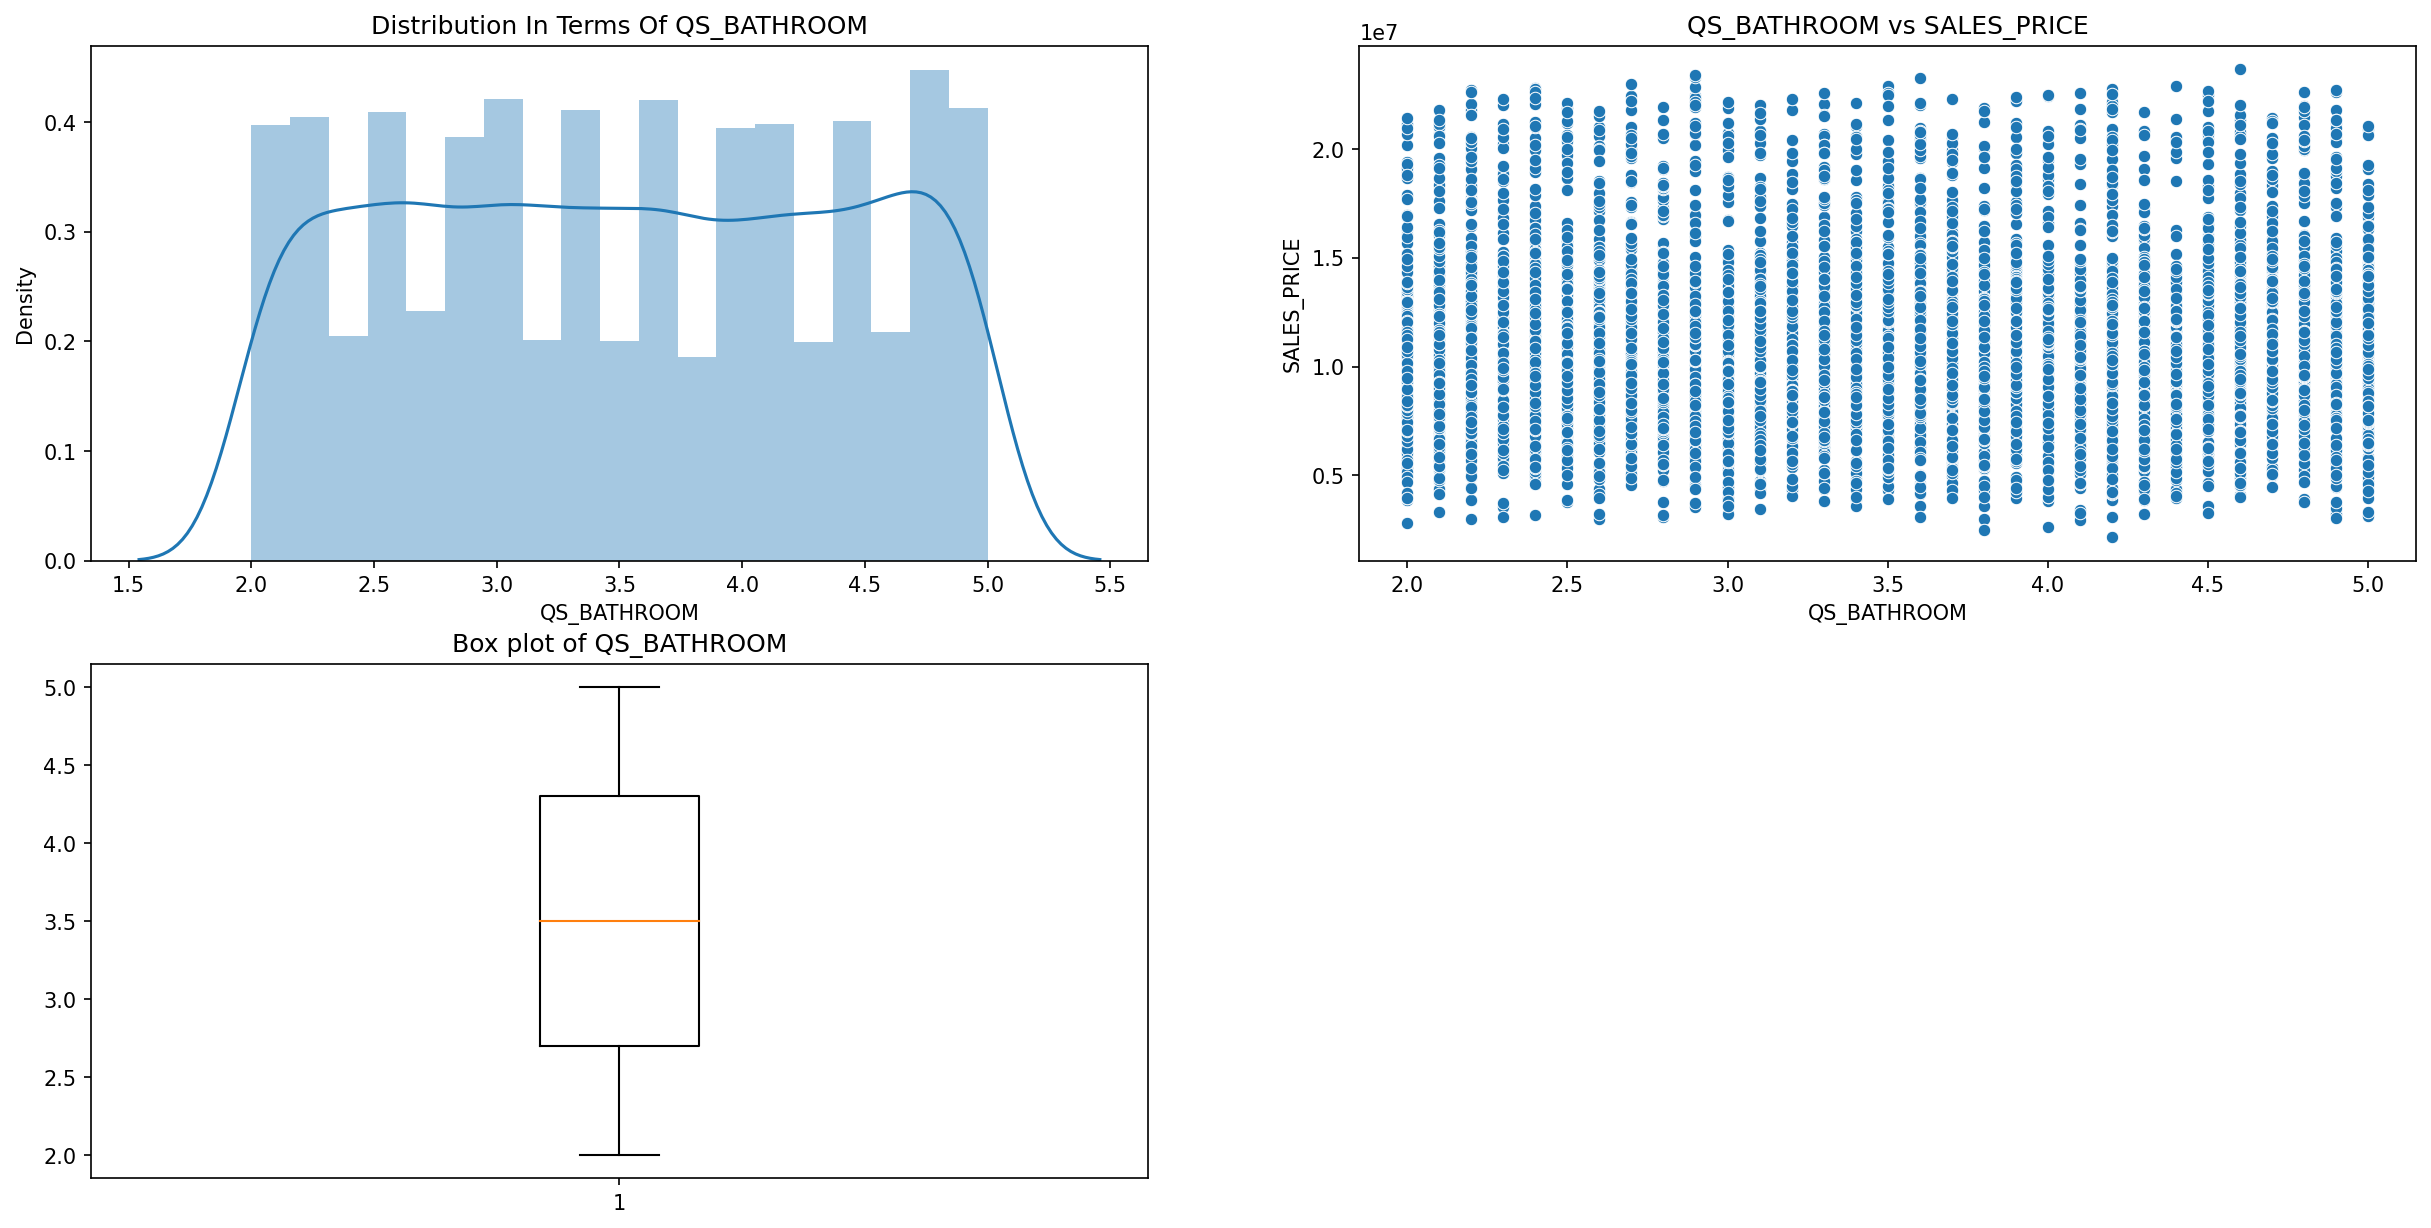

The corr between feauture and target : -0.011377384945967054


In [200]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.distplot(df['QS_BATHROOM'])
plt.title('Distribution In Terms Of QS_BATHROOM')

plt.subplot(2,2,2)
sns.scatterplot(data=df,x=df['QS_BATHROOM'],y=df['SALES_PRICE'])
plt.title('QS_BATHROOM vs SALES_PRICE')

plt.subplot(2,2,3)
plt.boxplot(df['QS_BATHROOM'])
plt.title('Box plot of QS_BATHROOM')

plt.show()

cor=df['QS_BATHROOM'].corr(df['SALES_PRICE'])
print('The corr between feauture and target :',cor)

### Interpretation:
* There is no linear relationship between **QS_BATHROOM** and **SALES_PRICE**.
* There is no outlier here.

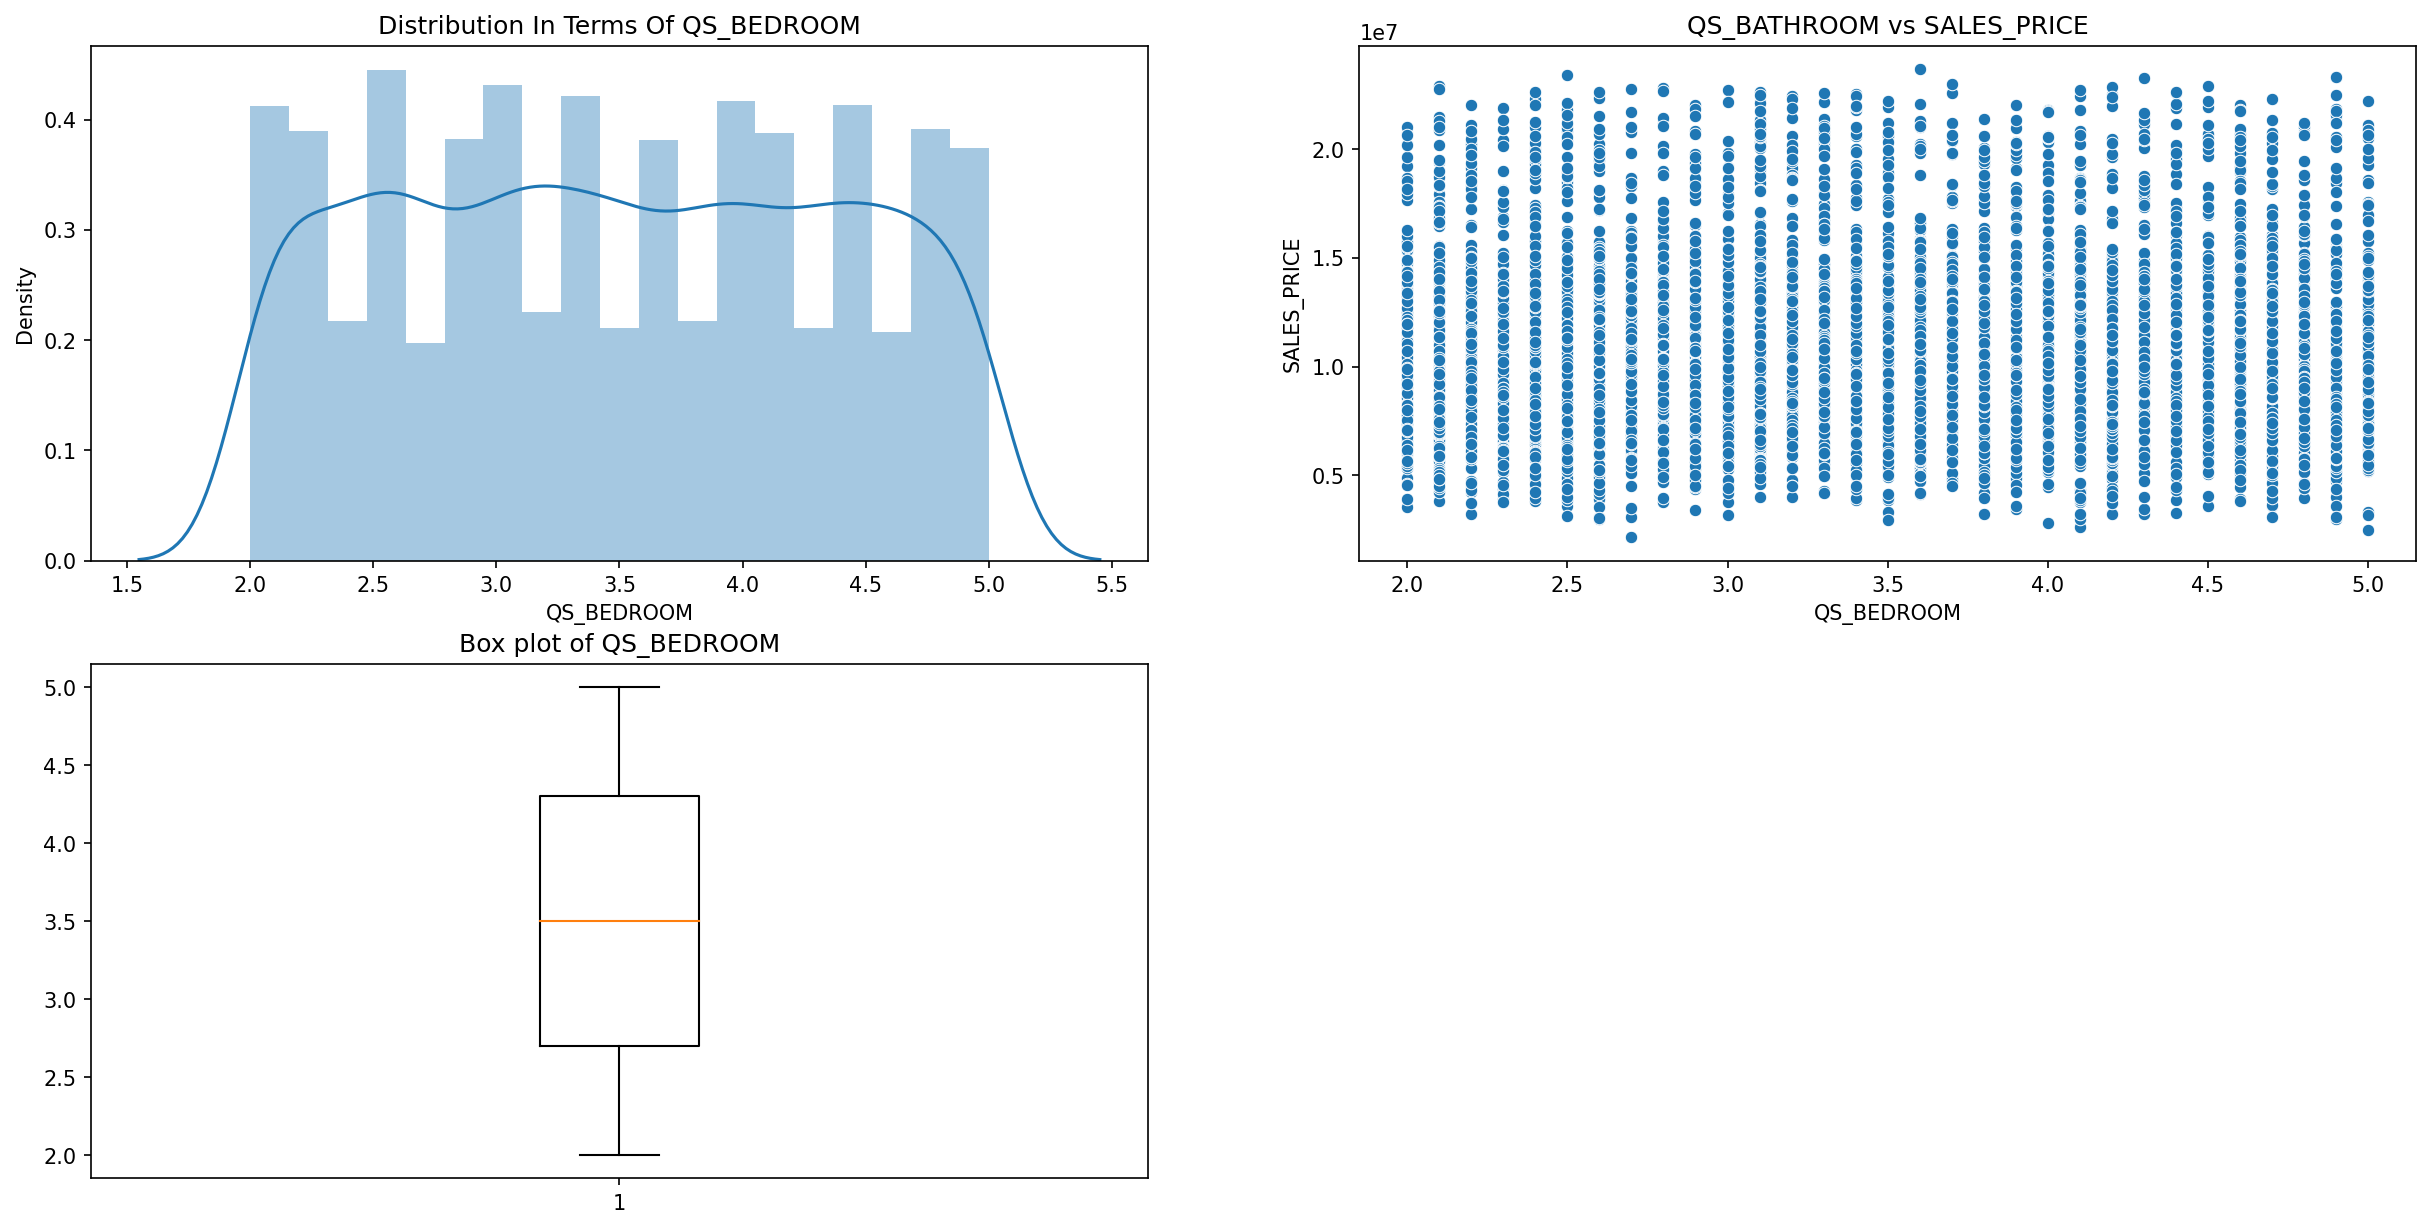

The corr between feauture and target : 0.018803963059181316


In [201]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.distplot(df['QS_BEDROOM'])
plt.title('Distribution In Terms Of QS_BEDROOM')

plt.subplot(2,2,2)
sns.scatterplot(data=df,x=df['QS_BEDROOM'],y=df['SALES_PRICE'])
plt.title('QS_BATHROOM vs SALES_PRICE')

plt.subplot(2,2,3)
plt.boxplot(df['QS_BEDROOM'])
plt.title('Box plot of QS_BEDROOM')

plt.show()

cor=df['QS_BEDROOM'].corr(df['SALES_PRICE'])
print('The corr between feauture and target :',cor)

### Interpretation:
* There is no linear relationship between **QS_BEDROOM** and **SALES_PRICE**.
* There is no outlier here.

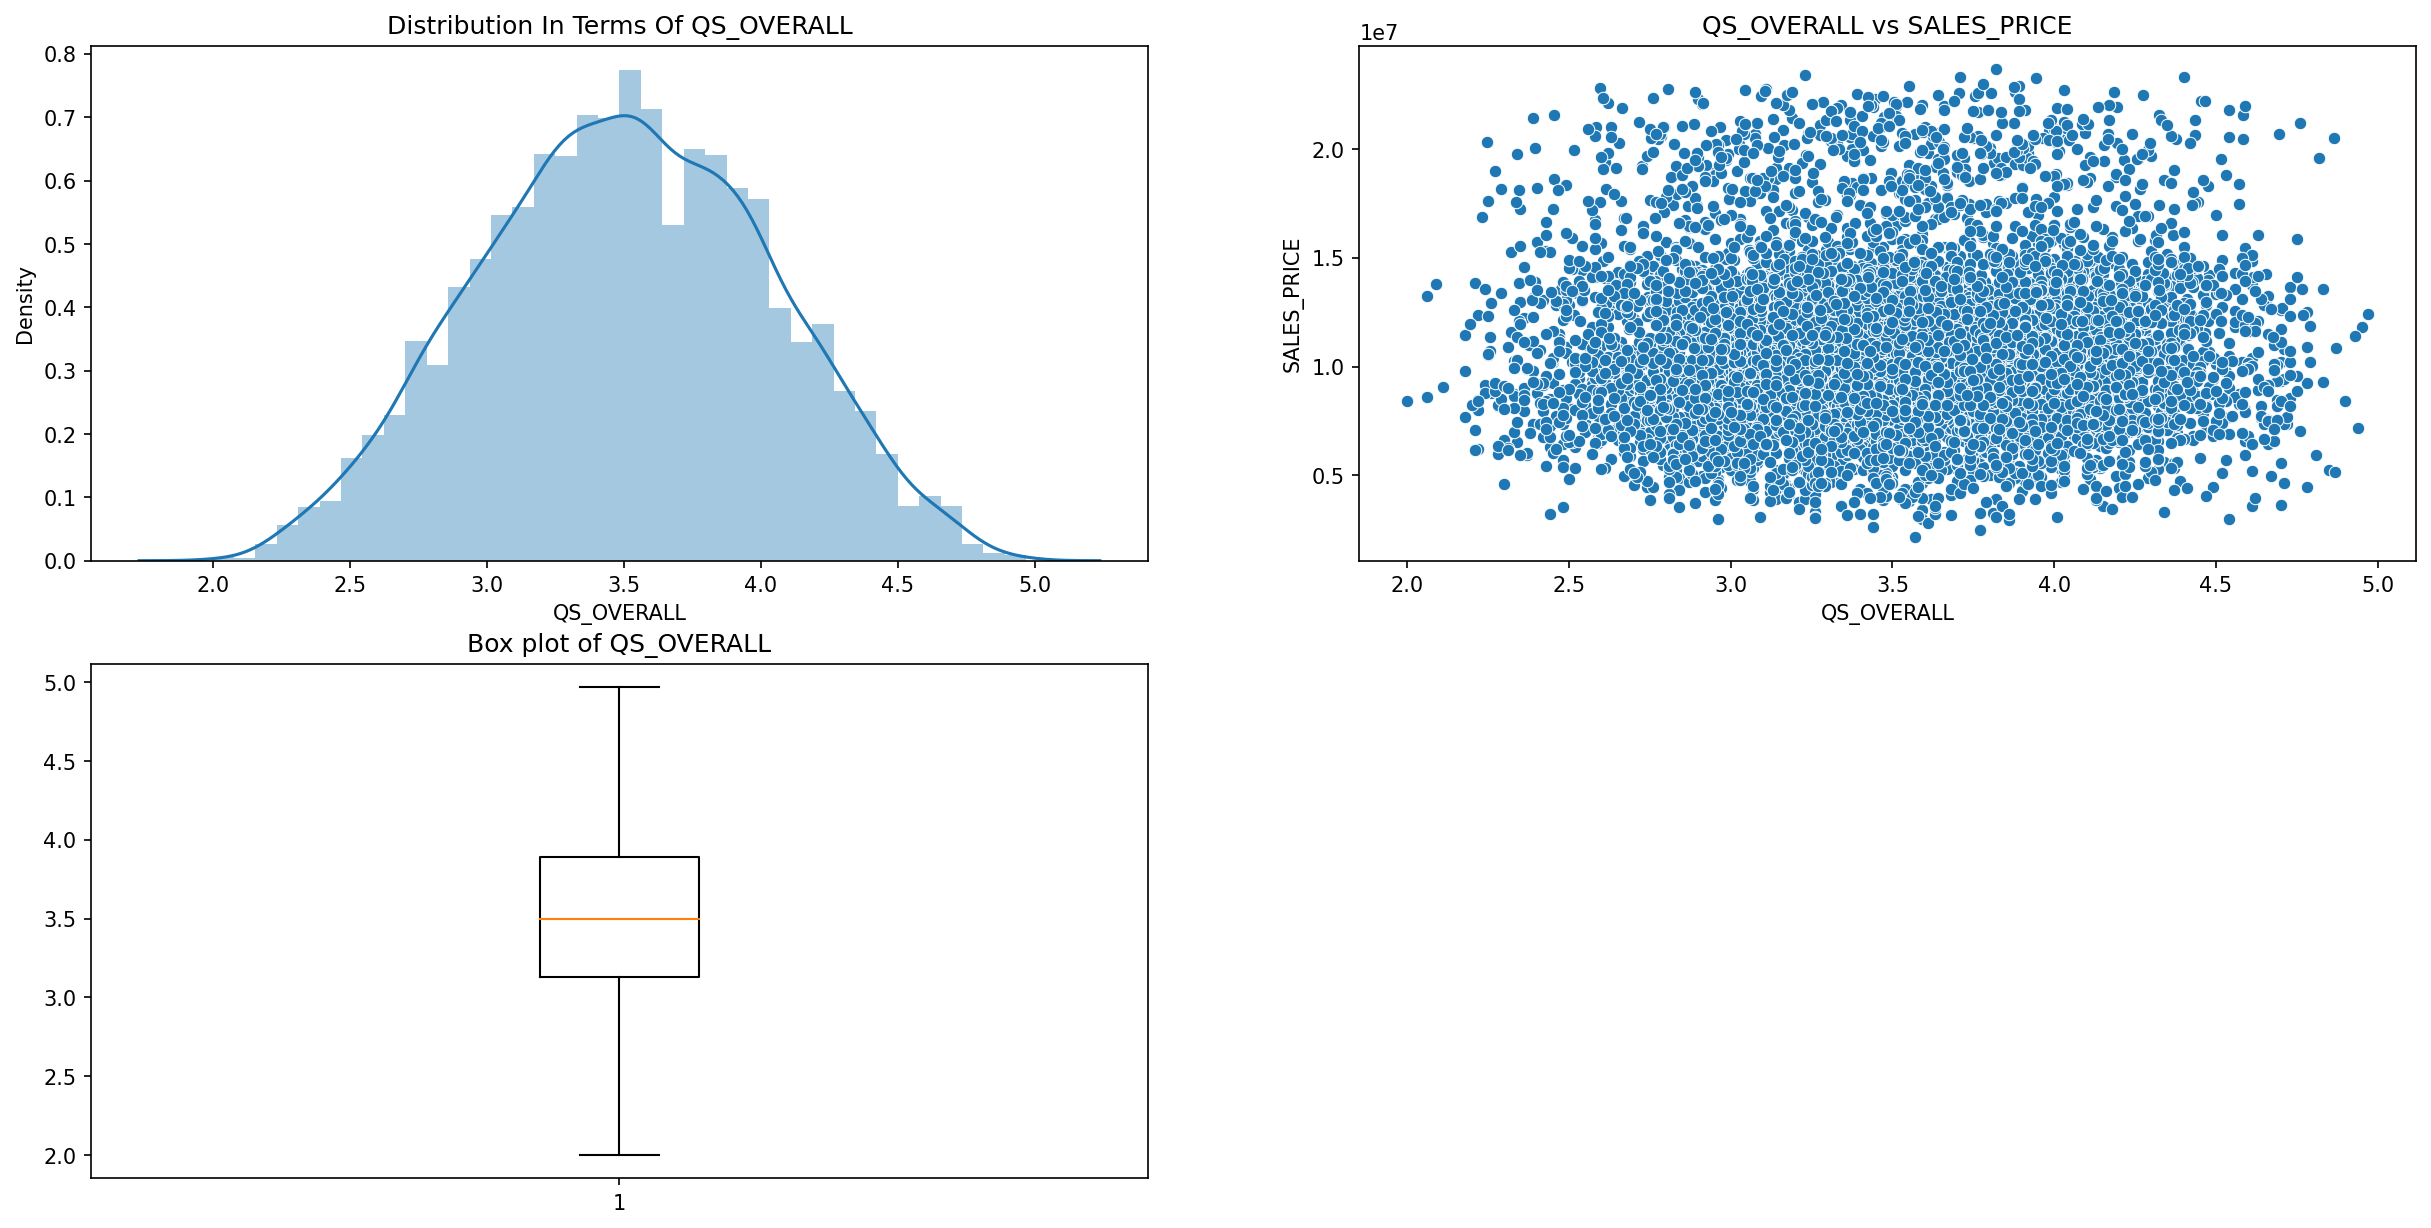

The corr between feauture and target : 0.020015779965668883


In [202]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.distplot(df['QS_OVERALL'])
plt.title('Distribution In Terms Of QS_OVERALL')

plt.subplot(2,2,2)
sns.scatterplot(data=df,x=df['QS_OVERALL'],y=df['SALES_PRICE'])
plt.title('QS_OVERALL vs SALES_PRICE')

plt.subplot(2,2,3)
plt.boxplot(df['QS_OVERALL'])
plt.title('Box plot of QS_OVERALL')

plt.show()

cor=df['QS_OVERALL'].corr(df['SALES_PRICE'])
print('The corr between feauture and target :',cor)

### Interpretation:
* There is no linear relationship between **QS_BEDROOM** and **SALES_PRICE**.
* There is no outlier here.

## OVERALL OBSERVATION
* There is no notable outlier which can affect the efficiency of the model.
* **QS_OVERALL,DIST_MAINROAD,QS_ROOMS',QS_BEDROOM,QS_BATHROOM** should be dropped as it don't have any relationship with target feauture.
* With increase in no of bedrooms , salesprice also increasing.
* Commercial building has highest salesprice followed by House and Others.
* There is a linear relationship between Area, MZ Zone, N ROOM, N BEDROOM, N BATHROOM, STREET,SALE COND and TOTAL SALE PRICE
* For AREA, STREET, MZ ZONE, and SALE COND, we apply ordinal label encoding.
* Although there is no linear relationship, BUILDTYPE does impact SALE PRICE. Therefore, for this column, we choose one hot encoding.




In [203]:
df.drop(['QS_OVERALL','DIST_MAINROAD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM'],axis=1,inplace=True)

In [204]:
for val in df.columns:
    if df[val].dtype=='object':
        print(val,'unique values are',df[val].unique())
        print()

AREA unique values are ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar']

SALE_COND unique values are ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']

PARK_FACIL unique values are ['Yes' 'No']

BUILDTYPE unique values are ['Commercial' 'Others' 'House']

UTILITY_AVAIL unique values are ['AllPub' 'ELO' 'NoSewr ']

STREET unique values are ['Paved' 'Gravel' 'No Access']

MZZONE unique values are ['A' 'RH' 'RL' 'I' 'C' 'RM']



### Encoding the categorical variables:
* We can map the categorical feauture values which follows the linear relationship with label encoding.
* For feauture which not following linear relationship, we will go with one hot encoding.

In [205]:
#Label encoding.
df['AREA']= df['AREA'].map({'Karapakkam': 0,
                           'Adyar': 1, 
                           'Chrompet' : 2,
                           'Velachery' : 3,
                           'KK Nagar' : 4, 
                           'Anna Nagar' : 5,
                           'TNagar' : 6})

df['PARK_FACIL'] = df['PARK_FACIL'].map({'Yes':1,
                                       'No':0})

df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({'ELO' : 0,  
                                             'NoSewr ' : 1,
                                             'AllPub' : 2})
                                          
df['STREET'] = df['STREET'].map({'No Access' : 0,
                               'Paved' : 1, 
                               'Gravel' : 2})


df['MZZONE'] = df['MZZONE'].map({'A' : 0,
                               'C' : 1,
                               'I' : 2,
                               'RH' : 4,#there is a break in a linear relaationship, so avoid it we skipping one number)
                               'RL' : 5,
                               'RM' : 6})

df['SALE_COND'] = df['SALE_COND'].map({'Partial' : 0,
                                'Family':1,
                                'AbNormal':2,
                                'Normal Sale':3,
                                'AdjLand':4})

In [206]:
#One hot encoding
df = pd.get_dummies(df, columns=['BUILDTYPE'])

In [207]:
df

AREA  SALE_COND  PARK_FACIL  UTILITY_AVAIL  STREET  MZZONE  BUILD_AGE  \
0        0          2           1              2       1       0         44   
1        5          2           0              2       2       4         11   
2        1          2           1              0       2       5         20   
3        3          1           0              1       1       2         22   
4        0          2           1              2       2       1         30   
...    ...        ...         ...            ...     ...     ...        ...   
7104     0          4           0              0       0       6         49   
7105     3          1           1              1       0       4          9   
7106     3          3           0              1       2       2         28   
7107     0          0           1              0       1       5         32   
7108     3          0           1              0       1       2         44   

      INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  SALES_PRICE  \
0         1004          1           1       3      7600000   
1         1986          2           1       5     21717770   
2          909          1           1       3     13159200   
3         1855          3           2       5      9630290   
4         1226          1           1       3      7406250   
...        ...        ...         ...     ...          ...   
7104       598          1           1       2      5353000   
7105      1897          3           2       5     10818480   
7106      1614          2           1       4      8351410   
7107       787          1           1       2      8507000   
7108      1896          3           2       5      9976480   

      BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  
0                        1                0                 0  
1                        1                0                 0  
2                        1                0                 0  
3                        0                0                 1  
4                        0                0                 1  
...                    ...              ...               ...  
7104                     0                0                 1  
7105                     0                0                 1  
7106                     0                1                 0  
7107                     1                0                 0  
7108                     0                0                 1  

[7109 rows x 15 columns]

### Preparing the data:

In [208]:
#Reindexing the column.
df=df.reindex(columns=['AREA','SALE_COND','PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'BUILD_AGE', 
       'INT_SQFT', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others', 
       'SALES_PRICE',])

In [209]:
#Initialising the values
X = df.drop(['SALES_PRICE'],axis=1)
y = df['SALES_PRICE']

#Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [210]:
X_train

AREA  SALE_COND  PARK_FACIL  UTILITY_AVAIL  STREET  MZZONE  BUILD_AGE  \
1891     0          3           0              1       2       6         13   
3001     5          0           0              2       2       5         23   
960      0          1           1              0       2       4         36   
1042     5          3           1              1       1       5         30   
1831     4          1           1              1       1       6         23   
...    ...        ...         ...            ...     ...     ...        ...   
905      4          0           1              2       1       4         28   
5192     0          4           1              1       0       5         33   
3980     1          3           1              2       1       4         27   
235      1          1           1              1       0       0          6   
5157     3          1           1              2       1       4         31   

      INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  BUILDTYPE_Commercial  \
1891      1265          1           1       3                     0   
3001      1738          1           1       4                     0   
960       1198          1           1       3                     1   
1042      1978          2           1       5                     0   
1831      1501          2           1       4                     0   
...        ...        ...         ...     ...                   ...   
905       1596          2           1       4                     1   
5192      1459          2           2       4                     0   
3980      1025          1           1       3                     1   
235       1072          1           1       3                     0   
5157      1725          2           1       4                     0   

      BUILDTYPE_House  BUILDTYPE_Others  
1891                0                 1  
3001                0                 1  
960                 0                 0  
1042                1                 0  
1831                0                 1  
...               ...               ...  
905                 0                 0  
5192                0                 1  
3980                0                 0  
235                 1                 0  
5157                1                 0  

[4976 rows x 14 columns]

### Scaling the data

In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [212]:
x_train

array([[-1.37314593,  0.69047348, -0.99558851, ..., -0.69318955,
        -0.72648903,  1.42493883],
       [ 1.33547777, -1.41780799, -0.99558851, ..., -0.69318955,
        -0.72648903,  1.42493883],
       [-1.37314593, -0.7150475 ,  1.00443104, ...,  1.44260686,
        -0.72648903, -0.70178451],
       ...,
       [-0.83142119,  0.69047348,  1.00443104, ...,  1.44260686,
        -0.72648903, -0.70178451],
       [-0.83142119, -0.7150475 ,  1.00443104, ..., -0.69318955,
         1.37648328, -0.70178451],
       [ 0.25202829, -0.7150475 ,  1.00443104, ..., -0.69318955,
         1.37648328, -0.70178451]])

# Modelling

## LINEAR REGRESSION

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_pred
#print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred))

array([16822903.56707394,  6879080.7333199 ,  6615658.77626301, ...,
        8512317.61104424, 11996991.70534744,  6588394.32580482])

In [214]:
y_pred = regressor.predict(x_test)
y_pred

array([16822903.56707394,  6879080.7333199 ,  6615658.77626301, ...,
        8512317.61104424, 11996991.70534744,  6588394.32580482])

In [215]:
res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
res

Actual     Predicted
5492  18543840  1.682290e+07
3039   7049500  6.879081e+06
2252   7660600  6.615659e+06
2488  14090500  1.412375e+07
4146   6576375  5.490410e+06
...        ...           ...
3607   6304750  5.202850e+06
6962   8347500  9.881916e+06
1839   8188000  8.512318e+06
1019  11291220  1.199699e+07
3300   7852185  6.588394e+06

[2133 rows x 2 columns]

In [216]:
lr_met = metrics.r2_score(y_test,y_pred)
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr_met*100),2),"%")

R2- SCORE FOR LINEAR REGRESSION: 92.46 %


## K-NEAREST NEIGHBOUR MODEL

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

MSE = []
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
k=model.best_params_

In [218]:
for i,j in k.items():
    knn = KNeighborsRegressor(j) 
    knn.fit(X_train,y_train)
    print("K value  : " , j, " score : ", metrics.r2_score(y_test,y_pred))   

K value  :  6  score :  0.9245700989258933


In [219]:
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [220]:
y_pred_knn = KNN.predict(x_test)
y_pred_knn

array([17516816.,  6725659.,  8043569., ...,  8940134., 12417240.,
        7340145.])

In [221]:
result_knn= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
result_knn

Actual   Predicted
5492  18543840  17516816.0
3039   7049500   6725659.0
2252   7660600   8043569.0
2488  14090500  13729888.0
4146   6576375   6779057.0
...        ...         ...
3607   6304750   6907190.0
6962   8347500  10071841.0
1839   8188000   8940134.0
1019  11291220  12417240.0
3300   7852185   7340145.0

[2133 rows x 2 columns]

In [222]:
KNN_met = metrics.r2_score(y_test,y_pred_knn)
print('R2- SCORE FOR KNN MODEL:', round((KNN_met*100),2),"%")

R2- SCORE FOR KNN MODEL: 94.54 %


## DECISION TREE MODEL

In [223]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100]:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(x_train, y_train) # the model is trained
    valAccuracy = cross_val_score(dt, x_train, y_train, cv=10, scoring = make_scorer(metrics.r2_score))
    print("DEPTH: ",depth,"R2-Score: ",np.mean(valAccuracy))

DEPTH:  1 R2-Score:  0.36183631881671047
DEPTH:  2 R2-Score:  0.682804518896492
DEPTH:  3 R2-Score:  0.8012112804197349
DEPTH:  4 R2-Score:  0.8803875998987138
DEPTH:  5 R2-Score:  0.9148047635558241
DEPTH:  6 R2-Score:  0.9354968969658973
DEPTH:  7 R2-Score:  0.9495898510341861
DEPTH:  8 R2-Score:  0.9601056602189246
DEPTH:  9 R2-Score:  0.96525020549653
DEPTH:  10 R2-Score:  0.9683101159361962
DEPTH:  20 R2-Score:  0.9700565019260236
DEPTH:  30 R2-Score:  0.97014970950616
DEPTH:  40 R2-Score:  0.9704265363328399
DEPTH:  50 R2-Score:  0.9704871078496892
DEPTH:  60 R2-Score:  0.9699970019060119
DEPTH:  100 R2-Score:  0.970491762931035


In [224]:
dt = DecisionTreeRegressor(max_depth=30)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=30)

In [225]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([18483960.,  7852000.,  7471850., ...,  8020500., 10502160.,
        8137800.])

In [226]:
res_dt=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_dt})
res_dt

Actual   Predicted
5492  18543840  18483960.0
3039   7049500   7852000.0
2252   7660600   7471850.0
2488  14090500  13039560.0
4146   6576375   6059625.0
...        ...         ...
3607   6304750   5995375.0
6962   8347500   9953250.0
1839   8188000   8020500.0
1019  11291220  10502160.0
3300   7852185   8137800.0

[2133 rows x 2 columns]

In [227]:
dt_met = metrics.r2_score(y_test,y_pred_dt)
print('R2- SCORE FOR DECISION TREE MODEL:', round((dt_met*100),2),"%")

R2- SCORE FOR DECISION TREE MODEL: 97.4 %


## RANDOM FOREST MODEL

In [228]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 150, max_depth = 10, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=150)

In [229]:
y_pred_rf = rf.predict(x_test)

In [230]:
res_rf= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
res_rf

Actual     Predicted
5492  18543840  1.831975e+07
3039   7049500  6.748332e+06
2252   7660600  7.636044e+06
2488  14090500  1.351800e+07
4146   6576375  5.890439e+06
...        ...           ...
3607   6304750  6.689864e+06
6962   8347500  8.377485e+06
1839   8188000  8.355183e+06
1019  11291220  1.147249e+07
3300   7852185  7.832600e+06

[2133 rows x 2 columns]

In [231]:
rf_met = metrics.r2_score(y_test,y_pred_rf)
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf_met*100),2),"%")


R2- SCORE FOR RANDOM FOREST MODEL : 97.87 %


## XG-BOOST MODEL

In [232]:
import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
    model.fit(x_train, y_train)
    print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Test score : ", model.score(x_test,y_test))

Learning rate :  0.01  Train score :  -0.31788939362193247  Test score :  -0.3246199922679689
Learning rate :  0.02  Train score :  0.8037660070130723  Test score :  0.7983560333144517
Learning rate :  0.03  Train score :  0.9645468324243457  Test score :  0.9599383520493509
Learning rate :  0.04  Train score :  0.9898996436582923  Test score :  0.985906705498432
Learning rate :  0.05  Train score :  0.9951158742917107  Test score :  0.9914684282710446
Learning rate :  0.1  Train score :  0.9986679468864758  Test score :  0.996199877962748
Learning rate :  0.11  Train score :  0.9988951348154081  Test score :  0.9965677583822901
Learning rate :  0.12  Train score :  0.9989058318888077  Test score :  0.9964760240360054
Learning rate :  0.13  Train score :  0.9989926563517056  Test score :  0.9964629657781541
Learning rate :  0.14  Train score :  0.9990215872345632  Test score :  0.9965781526487543
Learning rate :  0.15  Train score :  0.9991412679974326  Test score :  0.9968223296784448

In [233]:
xg = xgb.XGBRegressor(learning_rate = 0.15, n_estimators=100, verbosity = 0)
xg.fit(x_train, y_train)
y_pred_xg = xg.predict(x_test)

In [234]:
xg_met = metrics.r2_score(y_test,y_pred_xg)
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((xg_met*100),2),"%")

R2- SCORE FOR RANDOM FOREST MODEL : 99.68 %


## Finding the best model

In [235]:
r2={'R2_score':['LR', 'KNN', 'DT', 'RF',"XG"],
        'score':[92.46, 94.54, 97.42, 97.87,99.68]}
R2_df=pd.DataFrame(r2)
R2_df

R2_score  score
0       LR  92.46
1      KNN  94.54
2       DT  97.42
3       RF  97.87
4       XG  99.68

## Interpretation:
* From this we can interpret that **XG-BOOST** model gives highest score than others.
* Score of **XG-BOOST** model is 99.68%.

#  CONCLUSION:

* We can conclude from this project that many feautures plays major roles in setting the salesprice of the chennai houses.
* We started with understanding the data and cleaned the data to remove duplicates and imputing the missing values.
* we spent more amount of time in exploratory data analysis to find this insights , which helped to choose the feautures which were required to train the model.
* Most imprortantly area , sqft, no of bedromm , type of building played a major role in setting the price.
* Then we trained the data with 5 different models.
* we found thE **XG-BOOST** model gave the highest score of 0.9968.